# **Задание:**

Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте три класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались.

Нужно расставить индексы точек, определить, к какому классу относится какая точка с помощью генетического алгоритма. В результате каждый класс должен состоять из точек одного и того же индекса.

Визуализируйте процесс обучения и итоговый результат.


# Импортирование библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Создание точек

In [163]:
# Создадим точки на двухмерной плоскости

count_class = 3                             # Число классов
n = 1000                                    # Количество точек каждого класса
cnt = [[5, 5], [10,15], [15,5]]             # Зададим центры каждого класса

points = []                                 # Будущий массив с точками
for i in range(count_class):                # Три класса
  for j in range(n):                        # По n точек в каждом классе
    x = cnt[i][0] + np.random.normal(0, 1)  # Координата x данной точки
    y = cnt[i][1] + np.random.normal(0, 1)  # Координата y данной точки
    points.append([x,y])

In [164]:
points = np.array(points)  # Первод в numpy
print(points.shape)     # Узнаем размер массива

(3000, 2)


## Отображение на графике полученных точек

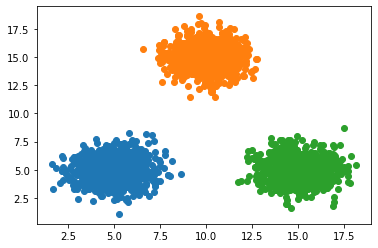

In [165]:
plt.scatter(points[:n,0], points[:n,1])
plt.scatter(points[n:n*2,0], points[n:n*2,1])
plt.scatter(points[n*2:,0], points[n*2:,1])
plt.show()

# Функции создания бота

In [43]:
# Создаyние случайного бота
def createBot(): 
  bot = np.array([random.randint(0,2) for i in range(count_class*n)])
  return bot

In [44]:
# Получение выжившей популяции
def getSurvPopul(popul, val, nsurv, reverse):  
  newpopul = []
  sval = sorted(val, reverse=reverse)
  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
  return newpopul, sval

In [45]:
# Функция для выбора родителей
def getParents(popul, nsurv): 
  idx1 = random.randint(0,nsurv-1)
  idx2 = random.randint(0,nsurv-1)
  botp1 = newpopul[idx1]
  botp2 = newpopul[idx2]

  return botp1, botp2


In [46]:
# Выбор гена нового бота
def crossPointFrom2Parents(botp1, botp2, j):
  pindex = random.random()
  if pindex < 0:
    x = botp1[j]
  else:     
    x = botp2[j]
  return x

In [47]:
# Определенение центров каждого класса
def getCenterClass(bot):
  center = []
  for i in range(count_class):
    pointsClass = points[bot==i, :]
    center.append(np.mean(pointsClass, axis=0))
  return center

In [48]:
# Функция расстояния
def getDistanceError(val, p):
  difference = val - p
  return np.sum(difference**2)

In [49]:
# Расстояние до ближайшей точки
def getDistancePoints(x, cls, point):
  data = points[cls, :]
  return min([getDistanceError(x, p) for p in data])

In [56]:
# Общая ошибка
def ErrorBot(bot):
  center = getCenterClass(bot)
  sum_error = 0
  for i in range(n):
    cen = center[bot[i]]
    error = getDistanceError(points[i], cen)
    error *= getDistancePoints(points[i], bot[i], points)
    sum_error += error

  sum_error /= points.shape[0]
  return sum_error

# Проверка
Создание рандомного бота и рассчет ошибки и отображение

In [166]:
bot = createBot()       # Создаем бота

In [90]:
bot

array([1, 1, 2, ..., 1, 0, 2])

In [91]:
print(ErrorBot(bot)) # Считаем для него ошибку

104.8234672993441


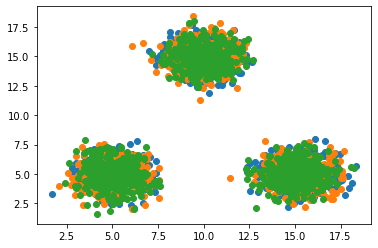

In [52]:
for i in range(count_class):         
  plot = points[bot==i,:]
  plt.scatter(plot[:,0], plot[:,1])
plt.show()        # Показываем график

# Создание популяции и применение генетического алгоритма

## 1000 точек каждого класса

In [58]:
npopul = 100         #  Размер популяции
nsurv = 20           #  Число выживших ботов
nnew = npopul-nsurv  #  Новых ботов
l = 3000             #  Генов у бота
mut = 0.05           #  Коэффициент мутации
epohs = 1000         #  Эпохи

0   [39.36, 39.41, 39.42, 39.42, 39.43]


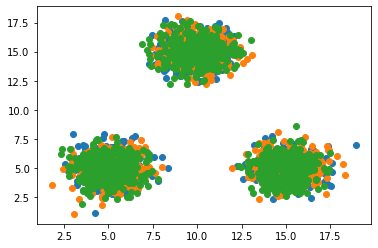

1   [39.36, 39.36, 39.36, 39.37, 39.38]
2   [39.32, 39.32, 39.33, 39.34, 39.34]
3   [39.28, 39.28, 39.28, 39.29, 39.29]
4   [39.21, 39.23, 39.25, 39.25, 39.25]
5   [39.12, 39.18, 39.2, 39.2, 39.21]
6   [39.12, 39.13, 39.13, 39.15, 39.16]
7   [38.96, 38.98, 39.04, 39.1, 39.1]
8   [38.94, 38.96, 38.96, 38.97, 38.98]
9   [38.92, 38.94, 38.94, 38.94, 38.95]
10   [38.83, 38.84, 38.88, 38.89, 38.89]
11   [38.78, 38.8, 38.83, 38.84, 38.84]
12   [38.7, 38.75, 38.78, 38.78, 38.8]
13   [38.7, 38.71, 38.73, 38.74, 38.75]
14   [38.7, 38.71, 38.72, 38.73, 38.73]
15   [38.69, 38.7, 38.7, 38.7, 38.71]
16   [38.66, 38.67, 38.68, 38.69, 38.69]
17   [38.59, 38.6, 38.62, 38.63, 38.66]
18   [38.51, 38.52, 38.54, 38.58, 38.59]
19   [38.46, 38.5, 38.51, 38.51, 38.52]
20   [38.45, 38.46, 38.46, 38.5, 38.5]


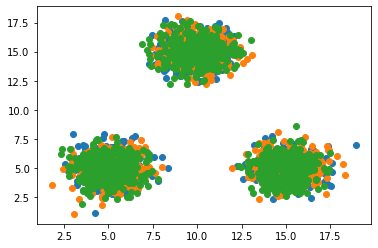

21   [38.4, 38.42, 38.43, 38.44, 38.45]
22   [38.29, 38.29, 38.35, 38.4, 38.4]
23   [38.29, 38.29, 38.29, 38.31, 38.31]
24   [38.27, 38.29, 38.29, 38.29, 38.3]
25   [38.15, 38.23, 38.24, 38.26, 38.27]
26   [38.12, 38.15, 38.19, 38.23, 38.23]
27   [38.12, 38.14, 38.15, 38.16, 38.18]
28   [38.08, 38.09, 38.11, 38.12, 38.14]
29   [38.05, 38.08, 38.08, 38.08, 38.09]
30   [37.95, 38.05, 38.05, 38.05, 38.06]
31   [37.95, 37.97, 37.99, 38.01, 38.05]
32   [37.86, 37.95, 37.95, 37.96, 37.97]
33   [37.86, 37.9, 37.91, 37.94, 37.95]
34   [37.86, 37.9, 37.9, 37.9, 37.91]
35   [37.85, 37.86, 37.87, 37.87, 37.9]
36   [37.85, 37.86, 37.87, 37.87, 37.9]
37   [37.81, 37.84, 37.85, 37.85, 37.86]
38   [37.77, 37.81, 37.81, 37.84, 37.85]
39   [37.77, 37.77, 37.8, 37.8, 37.81]
40   [37.72, 37.76, 37.77, 37.77, 37.78]


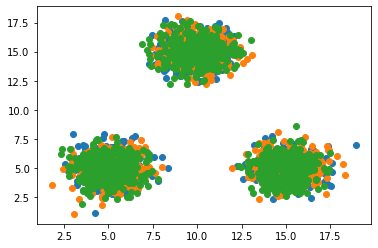

41   [37.68, 37.72, 37.76, 37.77, 37.77]
42   [37.68, 37.72, 37.75, 37.76, 37.76]
43   [37.68, 37.72, 37.72, 37.75, 37.75]
44   [37.68, 37.69, 37.69, 37.71, 37.72]
45   [37.67, 37.68, 37.68, 37.69, 37.69]
46   [37.61, 37.67, 37.68, 37.68, 37.69]
47   [37.54, 37.61, 37.62, 37.63, 37.65]
48   [37.54, 37.58, 37.61, 37.62, 37.63]
49   [37.54, 37.58, 37.6, 37.61, 37.62]
50   [37.54, 37.54, 37.58, 37.59, 37.6]
51   [37.54, 37.54, 37.56, 37.58, 37.59]
52   [37.54, 37.54, 37.56, 37.58, 37.58]
53   [37.47, 37.51, 37.54, 37.54, 37.54]
54   [37.47, 37.5, 37.51, 37.54, 37.54]
55   [37.46, 37.47, 37.5, 37.51, 37.53]
56   [37.46, 37.47, 37.5, 37.5, 37.51]
57   [37.41, 37.46, 37.47, 37.48, 37.5]
58   [37.3, 37.34, 37.39, 37.41, 37.44]
59   [37.3, 37.34, 37.39, 37.4, 37.4]
60   [37.27, 37.3, 37.34, 37.39, 37.39]


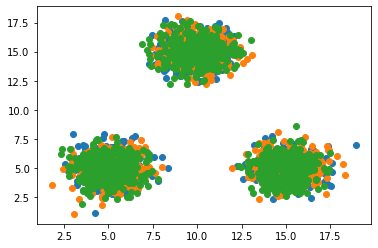

61   [37.27, 37.3, 37.3, 37.34, 37.39]
62   [37.17, 37.27, 37.3, 37.3, 37.32]
63   [37.17, 37.18, 37.22, 37.25, 37.27]
64   [37.17, 37.18, 37.19, 37.19, 37.22]
65   [37.17, 37.18, 37.19, 37.19, 37.2]
66   [37.09, 37.17, 37.18, 37.19, 37.19]
67   [37.05, 37.09, 37.13, 37.16, 37.17]
68   [37.05, 37.09, 37.09, 37.13, 37.16]
69   [37.05, 37.06, 37.09, 37.09, 37.13]
70   [37.05, 37.06, 37.07, 37.09, 37.09]
71   [36.97, 37.0, 37.05, 37.06, 37.07]
72   [36.97, 37.0, 37.02, 37.05, 37.06]
73   [36.97, 37.0, 37.02, 37.03, 37.05]
74   [36.95, 36.97, 37.0, 37.02, 37.02]
75   [36.95, 36.97, 36.99, 37.0, 37.0]
76   [36.95, 36.97, 36.99, 37.0, 37.0]
77   [36.91, 36.95, 36.97, 36.97, 36.98]
78   [36.91, 36.95, 36.96, 36.97, 36.97]
79   [36.91, 36.95, 36.96, 36.96, 36.97]
80   [36.91, 36.95, 36.95, 36.96, 36.96]


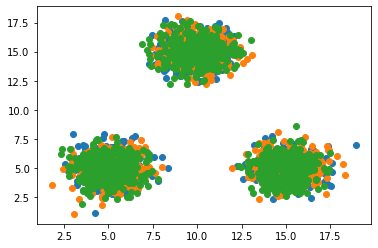

81   [36.71, 36.83, 36.91, 36.91, 36.95]
82   [36.59, 36.71, 36.74, 36.83, 36.91]
83   [36.59, 36.71, 36.71, 36.72, 36.73]
84   [36.59, 36.71, 36.71, 36.72, 36.73]
85   [36.59, 36.71, 36.71, 36.72, 36.73]
86   [36.5, 36.59, 36.71, 36.71, 36.72]
87   [36.5, 36.59, 36.59, 36.71, 36.71]
88   [36.5, 36.59, 36.59, 36.68, 36.71]
89   [36.5, 36.58, 36.59, 36.59, 36.59]
90   [36.5, 36.57, 36.57, 36.58, 36.59]
91   [36.5, 36.52, 36.57, 36.57, 36.58]
92   [36.5, 36.52, 36.57, 36.57, 36.58]
93   [36.5, 36.52, 36.55, 36.57, 36.57]
94   [36.5, 36.52, 36.54, 36.54, 36.55]
95   [36.5, 36.52, 36.53, 36.54, 36.54]
96   [36.5, 36.5, 36.52, 36.53, 36.54]
97   [36.5, 36.5, 36.52, 36.53, 36.54]
98   [36.5, 36.5, 36.52, 36.53, 36.54]
99   [36.43, 36.5, 36.5, 36.52, 36.53]
100   [36.43, 36.5, 36.5, 36.52, 36.53]


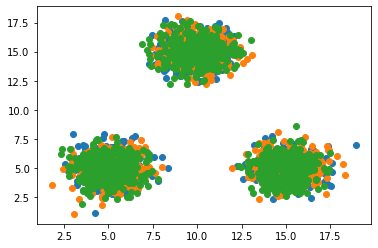

101   [36.39, 36.43, 36.45, 36.5, 36.5]
102   [36.39, 36.43, 36.45, 36.5, 36.5]
103   [36.39, 36.43, 36.45, 36.5, 36.5]
104   [36.39, 36.43, 36.45, 36.5, 36.5]
105   [36.39, 36.43, 36.45, 36.48, 36.5]
106   [36.39, 36.43, 36.43, 36.45, 36.48]
107   [36.37, 36.39, 36.43, 36.43, 36.45]
108   [36.34, 36.37, 36.39, 36.43, 36.43]
109   [36.34, 36.36, 36.36, 36.37, 36.39]
110   [36.18, 36.22, 36.34, 36.35, 36.36]
111   [36.18, 36.22, 36.34, 36.34, 36.35]
112   [36.18, 36.22, 36.34, 36.34, 36.35]
113   [36.18, 36.22, 36.24, 36.25, 36.28]
114   [36.18, 36.22, 36.24, 36.25, 36.28]
115   [36.18, 36.22, 36.24, 36.25, 36.28]
116   [36.18, 36.22, 36.24, 36.24, 36.25]
117   [36.18, 36.22, 36.24, 36.24, 36.25]
118   [36.18, 36.22, 36.22, 36.24, 36.24]
119   [36.18, 36.22, 36.22, 36.24, 36.24]
120   [36.1, 36.18, 36.22, 36.22, 36.24]


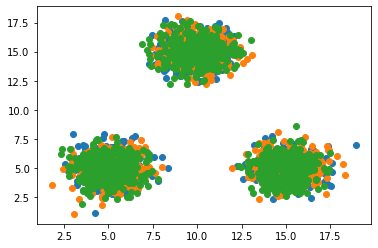

121   [36.1, 36.18, 36.22, 36.22, 36.24]
122   [36.1, 36.11, 36.18, 36.2, 36.21]
123   [36.1, 36.11, 36.18, 36.2, 36.21]
124   [36.05, 36.1, 36.11, 36.11, 36.18]
125   [36.05, 36.1, 36.11, 36.11, 36.18]
126   [36.05, 36.1, 36.11, 36.11, 36.18]
127   [36.05, 36.05, 36.1, 36.11, 36.11]
128   [36.05, 36.05, 36.1, 36.11, 36.11]
129   [35.9, 36.05, 36.05, 36.1, 36.11]
130   [35.9, 35.98, 36.02, 36.05, 36.05]
131   [35.9, 35.95, 35.98, 36.02, 36.05]
132   [35.9, 35.95, 35.98, 36.02, 36.02]
133   [35.9, 35.95, 35.98, 36.02, 36.02]
134   [35.9, 35.95, 35.98, 36.02, 36.02]
135   [35.89, 35.9, 35.95, 35.95, 35.98]
136   [35.89, 35.9, 35.9, 35.95, 35.95]
137   [35.89, 35.9, 35.9, 35.95, 35.95]
138   [35.76, 35.89, 35.9, 35.9, 35.95]
139   [35.76, 35.87, 35.89, 35.9, 35.9]
140   [35.76, 35.87, 35.89, 35.9, 35.9]


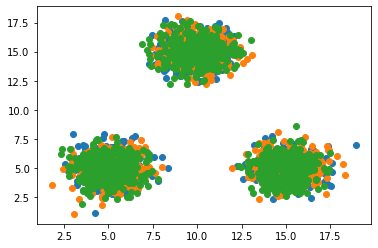

141   [35.76, 35.87, 35.89, 35.9, 35.9]
142   [35.76, 35.85, 35.87, 35.89, 35.9]
143   [35.76, 35.81, 35.85, 35.87, 35.89]
144   [35.76, 35.81, 35.85, 35.87, 35.89]
145   [35.76, 35.81, 35.85, 35.87, 35.89]
146   [35.76, 35.81, 35.83, 35.85, 35.87]
147   [35.76, 35.81, 35.83, 35.85, 35.87]
148   [35.76, 35.81, 35.83, 35.85, 35.87]
149   [35.76, 35.81, 35.83, 35.84, 35.85]
150   [35.76, 35.81, 35.83, 35.84, 35.85]
151   [35.76, 35.8, 35.81, 35.83, 35.84]
152   [35.76, 35.79, 35.8, 35.81, 35.83]
153   [35.76, 35.79, 35.8, 35.81, 35.81]
154   [35.76, 35.79, 35.79, 35.8, 35.81]
155   [35.76, 35.78, 35.79, 35.79, 35.8]
156   [35.72, 35.76, 35.78, 35.79, 35.79]
157   [35.72, 35.76, 35.78, 35.79, 35.79]
158   [35.72, 35.76, 35.78, 35.79, 35.79]
159   [35.72, 35.76, 35.78, 35.79, 35.79]
160   [35.72, 35.76, 35.78, 35.79, 35.79]


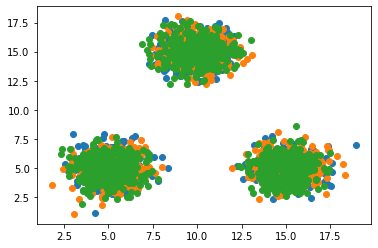

161   [35.72, 35.74, 35.76, 35.78, 35.78]
162   [35.59, 35.64, 35.72, 35.74, 35.76]
163   [35.59, 35.64, 35.72, 35.74, 35.76]
164   [35.59, 35.64, 35.72, 35.74, 35.76]
165   [35.59, 35.64, 35.68, 35.72, 35.74]
166   [35.59, 35.64, 35.68, 35.72, 35.74]
167   [35.59, 35.64, 35.68, 35.72, 35.74]
168   [35.59, 35.64, 35.68, 35.72, 35.74]
169   [35.59, 35.64, 35.68, 35.72, 35.72]
170   [35.59, 35.64, 35.67, 35.68, 35.72]
171   [35.59, 35.64, 35.67, 35.68, 35.72]
172   [35.59, 35.64, 35.67, 35.68, 35.72]
173   [35.59, 35.61, 35.64, 35.67, 35.68]
174   [35.59, 35.61, 35.62, 35.64, 35.67]
175   [35.59, 35.61, 35.62, 35.64, 35.67]
176   [35.59, 35.61, 35.62, 35.64, 35.67]
177   [35.53, 35.59, 35.6, 35.61, 35.62]
178   [35.53, 35.59, 35.6, 35.61, 35.62]
179   [35.53, 35.59, 35.6, 35.61, 35.62]
180   [35.53, 35.59, 35.6, 35.61, 35.62]


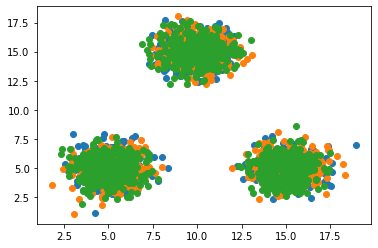

181   [35.5, 35.53, 35.59, 35.6, 35.61]
182   [35.5, 35.53, 35.59, 35.6, 35.61]
183   [35.5, 35.53, 35.57, 35.59, 35.6]
184   [35.5, 35.53, 35.57, 35.59, 35.6]
185   [35.5, 35.52, 35.53, 35.54, 35.57]
186   [35.5, 35.52, 35.53, 35.54, 35.57]
187   [35.5, 35.52, 35.53, 35.54, 35.57]
188   [35.5, 35.52, 35.53, 35.53, 35.54]
189   [35.5, 35.52, 35.53, 35.53, 35.53]
190   [35.44, 35.5, 35.52, 35.53, 35.53]
191   [35.44, 35.5, 35.51, 35.52, 35.52]
192   [35.44, 35.49, 35.5, 35.51, 35.52]
193   [35.44, 35.48, 35.49, 35.5, 35.51]
194   [35.44, 35.48, 35.49, 35.5, 35.51]
195   [35.44, 35.48, 35.49, 35.5, 35.51]
196   [35.44, 35.48, 35.49, 35.5, 35.51]
197   [35.44, 35.47, 35.48, 35.49, 35.5]
198   [35.44, 35.47, 35.48, 35.49, 35.5]
199   [35.44, 35.47, 35.48, 35.49, 35.5]
200   [35.44, 35.47, 35.48, 35.49, 35.5]


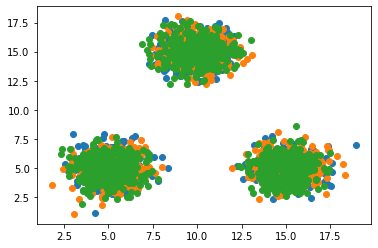

201   [35.44, 35.47, 35.48, 35.49, 35.5]
202   [35.44, 35.47, 35.48, 35.49, 35.5]
203   [35.44, 35.47, 35.48, 35.49, 35.5]
204   [35.44, 35.47, 35.48, 35.49, 35.5]
205   [35.44, 35.47, 35.48, 35.49, 35.5]
206   [35.44, 35.47, 35.48, 35.49, 35.5]
207   [35.44, 35.44, 35.47, 35.48, 35.49]
208   [35.43, 35.44, 35.44, 35.47, 35.47]
209   [35.43, 35.44, 35.44, 35.47, 35.47]
210   [35.43, 35.44, 35.44, 35.44, 35.47]
211   [35.43, 35.44, 35.44, 35.44, 35.47]
212   [35.43, 35.44, 35.44, 35.44, 35.47]
213   [35.43, 35.44, 35.44, 35.44, 35.47]
214   [35.43, 35.44, 35.44, 35.44, 35.47]
215   [35.43, 35.44, 35.44, 35.44, 35.47]
216   [35.43, 35.44, 35.44, 35.44, 35.46]
217   [35.39, 35.43, 35.44, 35.44, 35.44]
218   [35.39, 35.43, 35.44, 35.44, 35.44]
219   [35.39, 35.43, 35.44, 35.44, 35.44]
220   [35.39, 35.43, 35.44, 35.44, 35.44]


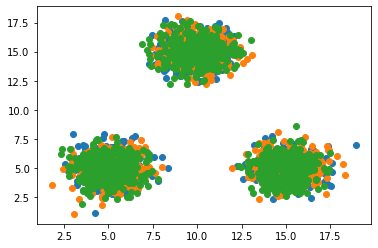

221   [35.38, 35.39, 35.43, 35.44, 35.44]
222   [35.38, 35.39, 35.43, 35.44, 35.44]
223   [35.38, 35.38, 35.39, 35.43, 35.44]
224   [35.24, 35.38, 35.38, 35.39, 35.43]
225   [35.24, 35.38, 35.38, 35.39, 35.43]
226   [35.24, 35.38, 35.38, 35.39, 35.39]
227   [35.24, 35.38, 35.38, 35.39, 35.39]
228   [35.24, 35.38, 35.38, 35.39, 35.39]
229   [35.24, 35.38, 35.38, 35.39, 35.39]
230   [35.24, 35.24, 35.38, 35.38, 35.39]
231   [35.24, 35.24, 35.3, 35.38, 35.38]
232   [35.24, 35.24, 35.3, 35.38, 35.38]
233   [35.24, 35.24, 35.3, 35.38, 35.38]
234   [35.24, 35.24, 35.3, 35.38, 35.38]
235   [35.14, 35.24, 35.24, 35.3, 35.38]
236   [35.14, 35.24, 35.24, 35.3, 35.36]
237   [35.14, 35.24, 35.24, 35.3, 35.36]
238   [35.14, 35.24, 35.24, 35.3, 35.36]
239   [35.14, 35.24, 35.24, 35.29, 35.3]
240   [35.14, 35.24, 35.24, 35.29, 35.3]


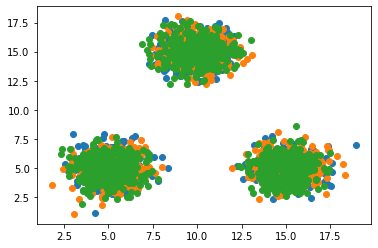

241   [35.14, 35.24, 35.24, 35.29, 35.3]
242   [35.14, 35.24, 35.24, 35.29, 35.3]
243   [35.14, 35.24, 35.24, 35.29, 35.3]
244   [35.12, 35.14, 35.24, 35.24, 35.29]
245   [35.12, 35.14, 35.24, 35.24, 35.29]
246   [35.12, 35.14, 35.24, 35.24, 35.29]
247   [35.12, 35.14, 35.24, 35.24, 35.24]
248   [35.12, 35.14, 35.16, 35.24, 35.24]
249   [35.12, 35.14, 35.16, 35.18, 35.24]
250   [35.12, 35.14, 35.16, 35.18, 35.24]
251   [35.12, 35.14, 35.16, 35.18, 35.24]
252   [35.12, 35.14, 35.16, 35.18, 35.24]
253   [35.12, 35.14, 35.16, 35.18, 35.24]
254   [35.12, 35.14, 35.16, 35.18, 35.24]
255   [35.12, 35.14, 35.16, 35.18, 35.24]
256   [35.12, 35.14, 35.16, 35.17, 35.18]
257   [35.12, 35.14, 35.16, 35.17, 35.18]
258   [35.12, 35.14, 35.16, 35.16, 35.17]
259   [35.12, 35.14, 35.16, 35.16, 35.17]
260   [35.11, 35.12, 35.14, 35.16, 35.16]


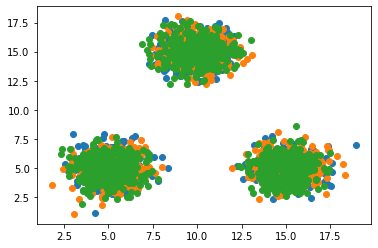

261   [35.11, 35.12, 35.14, 35.16, 35.16]
262   [35.11, 35.12, 35.14, 35.16, 35.16]
263   [35.11, 35.12, 35.14, 35.16, 35.16]
264   [35.11, 35.12, 35.14, 35.16, 35.16]
265   [35.11, 35.12, 35.14, 35.16, 35.16]
266   [35.11, 35.12, 35.14, 35.16, 35.16]
267   [35.11, 35.12, 35.14, 35.16, 35.16]
268   [35.05, 35.11, 35.11, 35.12, 35.14]
269   [35.05, 35.05, 35.11, 35.11, 35.12]
270   [35.05, 35.05, 35.11, 35.11, 35.12]
271   [35.05, 35.05, 35.11, 35.11, 35.12]
272   [35.05, 35.05, 35.07, 35.11, 35.11]
273   [35.05, 35.05, 35.07, 35.11, 35.11]
274   [35.05, 35.05, 35.07, 35.11, 35.11]
275   [35.05, 35.05, 35.07, 35.11, 35.11]
276   [35.05, 35.05, 35.07, 35.08, 35.11]
277   [35.05, 35.05, 35.07, 35.08, 35.11]
278   [34.96, 35.05, 35.05, 35.07, 35.08]
279   [34.96, 35.05, 35.05, 35.07, 35.08]
280   [34.96, 35.05, 35.05, 35.07, 35.08]


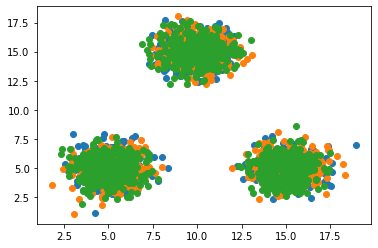

281   [34.94, 34.96, 35.05, 35.05, 35.07]
282   [34.94, 34.96, 35.05, 35.05, 35.07]
283   [34.94, 34.96, 35.05, 35.05, 35.06]
284   [34.94, 34.96, 35.05, 35.05, 35.06]
285   [34.94, 34.96, 35.05, 35.05, 35.06]
286   [34.94, 34.96, 35.05, 35.05, 35.06]
287   [34.94, 34.96, 35.0, 35.05, 35.05]
288   [34.88, 34.94, 34.96, 35.0, 35.05]
289   [34.88, 34.94, 34.94, 34.96, 35.0]
290   [34.88, 34.94, 34.94, 34.95, 34.96]
291   [34.88, 34.94, 34.94, 34.94, 34.95]
292   [34.88, 34.94, 34.94, 34.94, 34.95]
293   [34.88, 34.94, 34.94, 34.94, 34.95]
294   [34.88, 34.89, 34.94, 34.94, 34.94]
295   [34.88, 34.89, 34.92, 34.94, 34.94]
296   [34.72, 34.88, 34.89, 34.92, 34.94]
297   [34.72, 34.88, 34.89, 34.92, 34.94]
298   [34.72, 34.88, 34.89, 34.92, 34.94]
299   [34.72, 34.88, 34.88, 34.89, 34.92]
300   [34.72, 34.88, 34.88, 34.89, 34.92]


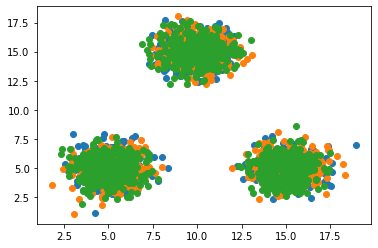

301   [34.72, 34.79, 34.88, 34.88, 34.89]
302   [34.72, 34.79, 34.88, 34.88, 34.89]
303   [34.72, 34.79, 34.88, 34.88, 34.89]
304   [34.72, 34.79, 34.87, 34.88, 34.88]
305   [34.72, 34.79, 34.87, 34.88, 34.88]
306   [34.72, 34.79, 34.87, 34.88, 34.88]
307   [34.72, 34.79, 34.84, 34.87, 34.88]
308   [34.72, 34.79, 34.84, 34.87, 34.87]
309   [34.72, 34.79, 34.84, 34.87, 34.87]
310   [34.72, 34.79, 34.84, 34.87, 34.87]
311   [34.72, 34.79, 34.84, 34.87, 34.87]
312   [34.69, 34.72, 34.79, 34.84, 34.87]
313   [34.69, 34.72, 34.79, 34.84, 34.87]
314   [34.69, 34.72, 34.79, 34.84, 34.87]
315   [34.69, 34.72, 34.79, 34.84, 34.87]
316   [34.69, 34.72, 34.79, 34.79, 34.84]
317   [34.69, 34.72, 34.79, 34.79, 34.84]
318   [34.69, 34.72, 34.79, 34.79, 34.84]
319   [34.69, 34.72, 34.79, 34.79, 34.84]
320   [34.69, 34.72, 34.79, 34.79, 34.84]


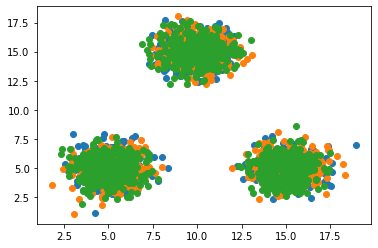

321   [34.69, 34.72, 34.79, 34.79, 34.79]
322   [34.69, 34.72, 34.79, 34.79, 34.79]
323   [34.69, 34.72, 34.76, 34.79, 34.79]
324   [34.69, 34.72, 34.75, 34.76, 34.79]
325   [34.69, 34.72, 34.75, 34.76, 34.77]
326   [34.69, 34.72, 34.75, 34.76, 34.77]
327   [34.69, 34.72, 34.75, 34.76, 34.77]
328   [34.69, 34.72, 34.74, 34.75, 34.76]
329   [34.69, 34.72, 34.74, 34.75, 34.76]
330   [34.69, 34.72, 34.74, 34.75, 34.76]
331   [34.69, 34.72, 34.74, 34.75, 34.76]
332   [34.69, 34.72, 34.74, 34.75, 34.76]
333   [34.69, 34.72, 34.74, 34.75, 34.76]
334   [34.69, 34.72, 34.74, 34.75, 34.76]
335   [34.69, 34.72, 34.74, 34.75, 34.76]
336   [34.69, 34.72, 34.74, 34.75, 34.75]
337   [34.69, 34.72, 34.74, 34.75, 34.75]
338   [34.69, 34.72, 34.74, 34.75, 34.75]
339   [34.69, 34.72, 34.74, 34.75, 34.75]
340   [34.69, 34.72, 34.74, 34.75, 34.75]


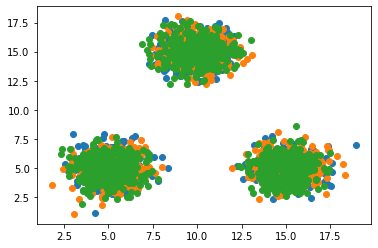

341   [34.53, 34.69, 34.72, 34.74, 34.75]
342   [34.53, 34.69, 34.72, 34.74, 34.75]
343   [34.53, 34.69, 34.72, 34.74, 34.75]
344   [34.53, 34.69, 34.72, 34.74, 34.75]
345   [34.53, 34.63, 34.65, 34.69, 34.72]
346   [34.53, 34.63, 34.65, 34.69, 34.7]
347   [34.53, 34.63, 34.65, 34.69, 34.7]
348   [34.53, 34.63, 34.65, 34.69, 34.7]
349   [34.53, 34.63, 34.65, 34.69, 34.7]
350   [34.53, 34.63, 34.65, 34.69, 34.7]
351   [34.53, 34.63, 34.65, 34.69, 34.7]
352   [34.53, 34.63, 34.65, 34.69, 34.7]
353   [34.53, 34.63, 34.65, 34.69, 34.7]
354   [34.53, 34.63, 34.65, 34.69, 34.7]
355   [34.53, 34.63, 34.65, 34.69, 34.7]
356   [34.53, 34.63, 34.65, 34.69, 34.7]
357   [34.53, 34.63, 34.65, 34.66, 34.68]
358   [34.53, 34.63, 34.65, 34.66, 34.68]
359   [34.53, 34.63, 34.65, 34.66, 34.68]
360   [34.53, 34.63, 34.65, 34.66, 34.68]


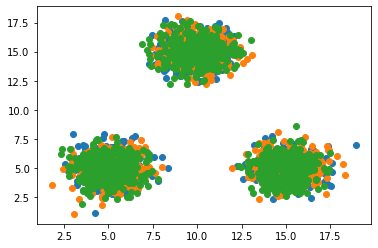

361   [34.53, 34.63, 34.65, 34.66, 34.68]
362   [34.53, 34.63, 34.65, 34.66, 34.68]
363   [34.53, 34.63, 34.65, 34.66, 34.67]
364   [34.53, 34.63, 34.65, 34.66, 34.67]
365   [34.53, 34.63, 34.65, 34.66, 34.67]
366   [34.53, 34.63, 34.65, 34.66, 34.67]
367   [34.53, 34.63, 34.65, 34.66, 34.67]
368   [34.53, 34.63, 34.65, 34.66, 34.67]
369   [34.53, 34.63, 34.65, 34.66, 34.67]
370   [34.53, 34.63, 34.65, 34.66, 34.66]
371   [34.53, 34.63, 34.64, 34.65, 34.66]
372   [34.53, 34.63, 34.64, 34.65, 34.66]
373   [34.53, 34.63, 34.64, 34.65, 34.66]
374   [34.53, 34.63, 34.64, 34.64, 34.65]
375   [34.53, 34.63, 34.64, 34.64, 34.65]
376   [34.53, 34.63, 34.64, 34.64, 34.65]
377   [34.53, 34.63, 34.64, 34.64, 34.65]
378   [34.53, 34.63, 34.64, 34.64, 34.65]
379   [34.53, 34.63, 34.64, 34.64, 34.65]
380   [34.53, 34.63, 34.63, 34.64, 34.64]


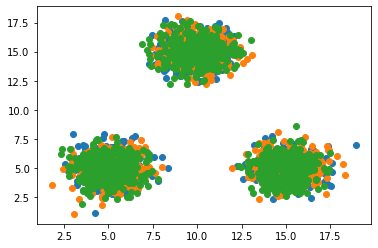

381   [34.53, 34.63, 34.63, 34.64, 34.64]
382   [34.53, 34.63, 34.63, 34.64, 34.64]
383   [34.53, 34.63, 34.63, 34.64, 34.64]
384   [34.53, 34.53, 34.63, 34.63, 34.64]
385   [34.53, 34.53, 34.63, 34.63, 34.64]
386   [34.53, 34.53, 34.58, 34.62, 34.63]
387   [34.53, 34.53, 34.58, 34.62, 34.63]
388   [34.53, 34.53, 34.58, 34.62, 34.63]
389   [34.53, 34.53, 34.58, 34.62, 34.63]
390   [34.53, 34.53, 34.58, 34.62, 34.63]
391   [34.53, 34.53, 34.57, 34.58, 34.62]
392   [34.53, 34.53, 34.57, 34.57, 34.58]
393   [34.53, 34.53, 34.57, 34.57, 34.58]
394   [34.53, 34.53, 34.57, 34.57, 34.58]
395   [34.53, 34.53, 34.57, 34.57, 34.58]
396   [34.53, 34.53, 34.57, 34.57, 34.58]
397   [34.53, 34.53, 34.57, 34.57, 34.58]
398   [34.53, 34.53, 34.57, 34.57, 34.58]
399   [34.53, 34.53, 34.57, 34.57, 34.58]
400   [34.53, 34.53, 34.57, 34.57, 34.58]


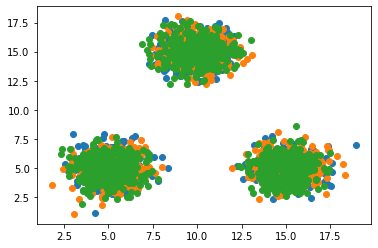

401   [34.53, 34.53, 34.57, 34.57, 34.58]
402   [34.53, 34.53, 34.57, 34.57, 34.58]
403   [34.53, 34.53, 34.57, 34.57, 34.58]
404   [34.53, 34.53, 34.57, 34.57, 34.58]
405   [34.53, 34.53, 34.57, 34.57, 34.58]
406   [34.53, 34.53, 34.57, 34.57, 34.58]
407   [34.46, 34.53, 34.53, 34.57, 34.57]
408   [34.46, 34.53, 34.53, 34.57, 34.57]
409   [34.46, 34.5, 34.53, 34.53, 34.57]
410   [34.46, 34.5, 34.53, 34.53, 34.57]
411   [34.46, 34.5, 34.53, 34.53, 34.57]
412   [34.46, 34.5, 34.53, 34.53, 34.57]
413   [34.46, 34.5, 34.53, 34.53, 34.57]
414   [34.45, 34.46, 34.5, 34.53, 34.53]
415   [34.45, 34.46, 34.5, 34.53, 34.53]
416   [34.45, 34.46, 34.5, 34.53, 34.53]
417   [34.45, 34.46, 34.47, 34.5, 34.53]
418   [34.45, 34.46, 34.47, 34.5, 34.53]
419   [34.45, 34.46, 34.47, 34.5, 34.53]
420   [34.45, 34.46, 34.47, 34.5, 34.53]


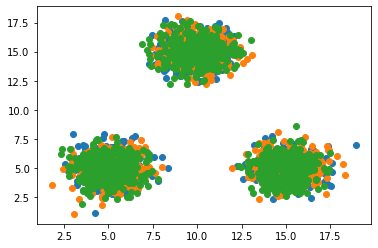

421   [34.45, 34.46, 34.47, 34.5, 34.53]
422   [34.45, 34.46, 34.47, 34.5, 34.53]
423   [34.45, 34.46, 34.47, 34.5, 34.53]
424   [34.45, 34.46, 34.47, 34.5, 34.53]
425   [34.45, 34.46, 34.47, 34.5, 34.53]
426   [34.45, 34.46, 34.47, 34.5, 34.53]
427   [34.45, 34.46, 34.47, 34.5, 34.53]
428   [34.45, 34.46, 34.47, 34.47, 34.5]
429   [34.45, 34.45, 34.46, 34.47, 34.47]
430   [34.45, 34.45, 34.46, 34.47, 34.47]
431   [34.45, 34.45, 34.46, 34.47, 34.47]
432   [34.45, 34.45, 34.46, 34.47, 34.47]
433   [34.45, 34.45, 34.46, 34.47, 34.47]
434   [34.43, 34.45, 34.45, 34.46, 34.47]
435   [34.43, 34.45, 34.45, 34.46, 34.47]
436   [34.43, 34.45, 34.45, 34.46, 34.47]
437   [34.43, 34.45, 34.45, 34.46, 34.47]
438   [34.43, 34.45, 34.45, 34.46, 34.47]
439   [34.43, 34.45, 34.45, 34.46, 34.47]
440   [34.43, 34.45, 34.45, 34.46, 34.47]


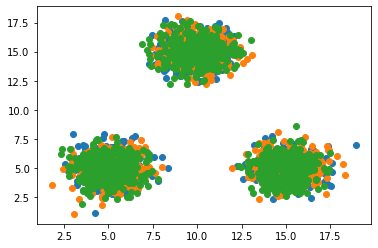

441   [34.43, 34.45, 34.45, 34.46, 34.47]
442   [34.43, 34.45, 34.45, 34.46, 34.47]
443   [34.4, 34.43, 34.45, 34.45, 34.46]
444   [34.4, 34.41, 34.43, 34.45, 34.45]
445   [34.4, 34.41, 34.43, 34.45, 34.45]
446   [34.4, 34.41, 34.43, 34.45, 34.45]
447   [34.4, 34.41, 34.43, 34.45, 34.45]
448   [34.38, 34.4, 34.41, 34.43, 34.45]
449   [34.38, 34.4, 34.41, 34.43, 34.45]
450   [34.38, 34.4, 34.41, 34.43, 34.45]
451   [34.38, 34.4, 34.41, 34.43, 34.45]
452   [34.38, 34.4, 34.41, 34.43, 34.45]
453   [34.38, 34.4, 34.41, 34.43, 34.45]
454   [34.38, 34.4, 34.41, 34.43, 34.45]
455   [34.38, 34.4, 34.41, 34.41, 34.43]
456   [34.38, 34.4, 34.41, 34.41, 34.43]
457   [34.38, 34.4, 34.41, 34.41, 34.43]
458   [34.38, 34.4, 34.41, 34.41, 34.43]
459   [34.38, 34.4, 34.41, 34.41, 34.43]
460   [34.38, 34.4, 34.41, 34.41, 34.43]


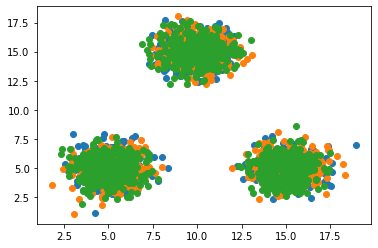

461   [34.38, 34.4, 34.41, 34.41, 34.43]
462   [34.38, 34.4, 34.41, 34.41, 34.43]
463   [34.38, 34.4, 34.41, 34.41, 34.43]
464   [34.38, 34.4, 34.41, 34.41, 34.43]
465   [34.38, 34.38, 34.4, 34.41, 34.41]
466   [34.38, 34.38, 34.4, 34.41, 34.41]
467   [34.38, 34.38, 34.4, 34.41, 34.41]
468   [34.38, 34.38, 34.4, 34.41, 34.41]
469   [34.38, 34.38, 34.4, 34.41, 34.41]
470   [34.38, 34.38, 34.4, 34.41, 34.41]
471   [34.38, 34.38, 34.4, 34.41, 34.41]
472   [34.38, 34.38, 34.4, 34.41, 34.41]
473   [34.38, 34.38, 34.4, 34.41, 34.41]
474   [34.38, 34.38, 34.4, 34.41, 34.41]
475   [34.38, 34.38, 34.4, 34.41, 34.41]
476   [34.38, 34.38, 34.4, 34.41, 34.41]
477   [34.38, 34.38, 34.4, 34.41, 34.41]
478   [34.38, 34.38, 34.4, 34.41, 34.41]
479   [34.38, 34.38, 34.4, 34.41, 34.41]
480   [34.38, 34.38, 34.39, 34.4, 34.41]


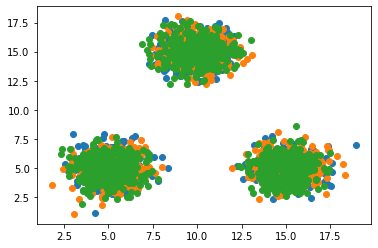

481   [34.38, 34.38, 34.39, 34.4, 34.41]
482   [34.38, 34.38, 34.39, 34.4, 34.41]
483   [34.34, 34.38, 34.38, 34.39, 34.4]
484   [34.34, 34.38, 34.38, 34.39, 34.4]
485   [34.34, 34.38, 34.38, 34.39, 34.39]
486   [34.34, 34.38, 34.38, 34.39, 34.39]
487   [34.34, 34.38, 34.38, 34.39, 34.39]
488   [34.34, 34.38, 34.38, 34.39, 34.39]
489   [34.34, 34.38, 34.38, 34.39, 34.39]
490   [34.34, 34.38, 34.38, 34.39, 34.39]
491   [34.34, 34.38, 34.38, 34.39, 34.39]
492   [34.33, 34.34, 34.38, 34.38, 34.39]
493   [34.33, 34.34, 34.38, 34.38, 34.39]
494   [34.33, 34.34, 34.38, 34.38, 34.39]
495   [34.33, 34.34, 34.38, 34.38, 34.39]
496   [34.33, 34.34, 34.38, 34.38, 34.39]
497   [34.33, 34.34, 34.38, 34.38, 34.38]
498   [34.33, 34.34, 34.38, 34.38, 34.38]
499   [34.29, 34.33, 34.34, 34.38, 34.38]
500   [34.29, 34.33, 34.34, 34.38, 34.38]


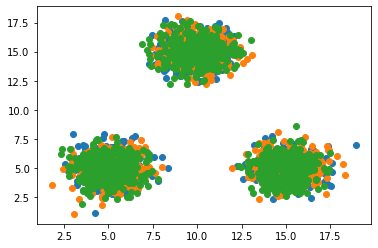

501   [34.25, 34.29, 34.33, 34.34, 34.38]
502   [34.25, 34.29, 34.33, 34.34, 34.38]
503   [34.25, 34.29, 34.33, 34.34, 34.38]
504   [34.25, 34.29, 34.33, 34.34, 34.38]
505   [34.25, 34.29, 34.33, 34.34, 34.34]
506   [34.25, 34.29, 34.33, 34.34, 34.34]
507   [34.25, 34.29, 34.33, 34.34, 34.34]
508   [34.25, 34.29, 34.33, 34.34, 34.34]
509   [34.25, 34.29, 34.33, 34.34, 34.34]
510   [34.25, 34.29, 34.33, 34.34, 34.34]
511   [34.25, 34.29, 34.33, 34.34, 34.34]
512   [34.25, 34.29, 34.33, 34.34, 34.34]
513   [34.25, 34.29, 34.33, 34.34, 34.34]
514   [34.25, 34.29, 34.33, 34.34, 34.34]
515   [34.25, 34.29, 34.33, 34.34, 34.34]
516   [34.25, 34.29, 34.33, 34.34, 34.34]
517   [34.25, 34.29, 34.33, 34.34, 34.34]
518   [34.25, 34.29, 34.33, 34.34, 34.34]
519   [34.25, 34.27, 34.29, 34.33, 34.34]
520   [34.25, 34.27, 34.29, 34.33, 34.34]


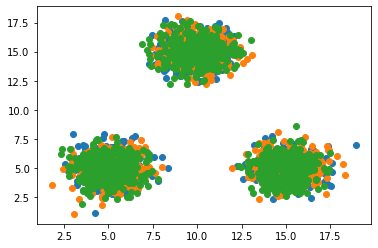

521   [34.25, 34.27, 34.29, 34.33, 34.34]
522   [34.25, 34.27, 34.29, 34.33, 34.34]
523   [34.25, 34.27, 34.29, 34.33, 34.34]
524   [34.25, 34.27, 34.29, 34.33, 34.34]
525   [34.25, 34.27, 34.29, 34.33, 34.34]
526   [34.25, 34.27, 34.29, 34.29, 34.33]
527   [34.25, 34.27, 34.29, 34.29, 34.33]
528   [34.25, 34.27, 34.28, 34.29, 34.29]
529   [34.19, 34.25, 34.27, 34.28, 34.29]
530   [34.19, 34.22, 34.25, 34.27, 34.28]
531   [34.06, 34.19, 34.22, 34.25, 34.27]
532   [34.06, 34.16, 34.19, 34.22, 34.25]
533   [34.06, 34.16, 34.19, 34.22, 34.25]
534   [34.06, 34.16, 34.19, 34.22, 34.25]
535   [34.06, 34.16, 34.19, 34.22, 34.25]
536   [34.06, 34.16, 34.19, 34.22, 34.25]
537   [34.06, 34.16, 34.19, 34.22, 34.25]
538   [34.06, 34.16, 34.19, 34.19, 34.22]
539   [34.06, 34.16, 34.19, 34.19, 34.22]
540   [34.06, 34.16, 34.19, 34.19, 34.22]


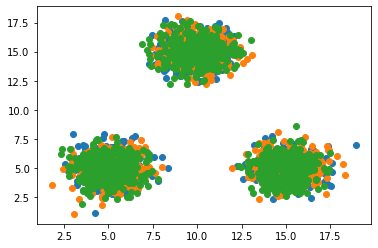

541   [34.06, 34.16, 34.19, 34.19, 34.22]
542   [34.06, 34.16, 34.19, 34.19, 34.22]
543   [34.06, 34.16, 34.19, 34.19, 34.22]
544   [34.06, 34.16, 34.19, 34.19, 34.22]
545   [34.06, 34.15, 34.16, 34.19, 34.19]
546   [34.06, 34.07, 34.15, 34.16, 34.19]
547   [34.04, 34.06, 34.07, 34.15, 34.16]
548   [34.04, 34.06, 34.07, 34.15, 34.16]
549   [34.04, 34.06, 34.07, 34.15, 34.16]
550   [34.04, 34.06, 34.07, 34.15, 34.16]
551   [34.04, 34.06, 34.07, 34.15, 34.16]
552   [34.04, 34.06, 34.07, 34.15, 34.16]
553   [34.04, 34.06, 34.07, 34.15, 34.16]
554   [34.04, 34.06, 34.07, 34.15, 34.16]
555   [34.04, 34.06, 34.07, 34.15, 34.16]
556   [34.04, 34.06, 34.07, 34.15, 34.16]
557   [34.04, 34.06, 34.07, 34.15, 34.16]
558   [34.04, 34.06, 34.07, 34.15, 34.16]
559   [34.04, 34.06, 34.07, 34.15, 34.16]
560   [34.04, 34.06, 34.07, 34.15, 34.16]


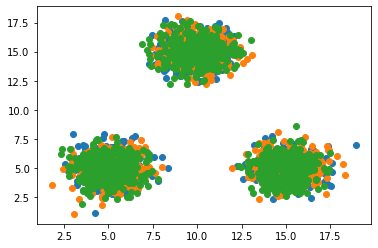

561   [34.04, 34.06, 34.07, 34.15, 34.16]
562   [34.04, 34.06, 34.07, 34.09, 34.15]
563   [34.04, 34.06, 34.07, 34.09, 34.14]
564   [34.04, 34.06, 34.07, 34.09, 34.14]
565   [34.04, 34.06, 34.07, 34.09, 34.14]
566   [34.04, 34.06, 34.07, 34.09, 34.14]
567   [34.04, 34.06, 34.07, 34.09, 34.14]
568   [34.04, 34.06, 34.07, 34.09, 34.14]
569   [34.04, 34.06, 34.07, 34.09, 34.14]
570   [34.04, 34.06, 34.07, 34.09, 34.14]
571   [34.04, 34.06, 34.07, 34.09, 34.14]
572   [34.04, 34.06, 34.07, 34.09, 34.12]
573   [34.04, 34.06, 34.07, 34.08, 34.09]
574   [34.04, 34.06, 34.07, 34.08, 34.09]
575   [34.04, 34.06, 34.07, 34.08, 34.09]
576   [34.04, 34.06, 34.07, 34.08, 34.09]
577   [34.04, 34.06, 34.07, 34.08, 34.09]
578   [34.04, 34.06, 34.07, 34.08, 34.09]
579   [34.04, 34.06, 34.07, 34.07, 34.08]
580   [34.04, 34.06, 34.07, 34.07, 34.08]


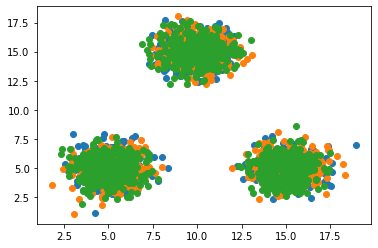

581   [34.04, 34.06, 34.07, 34.07, 34.08]
582   [34.04, 34.06, 34.07, 34.07, 34.08]
583   [34.04, 34.06, 34.07, 34.07, 34.08]
584   [34.04, 34.06, 34.07, 34.07, 34.08]
585   [34.04, 34.06, 34.07, 34.07, 34.07]
586   [34.04, 34.06, 34.07, 34.07, 34.07]
587   [34.04, 34.06, 34.07, 34.07, 34.07]
588   [33.95, 34.04, 34.06, 34.07, 34.07]
589   [33.95, 34.04, 34.06, 34.07, 34.07]
590   [33.76, 33.95, 34.04, 34.06, 34.07]
591   [33.76, 33.92, 33.95, 33.99, 34.04]
592   [33.76, 33.92, 33.95, 33.99, 34.04]
593   [33.76, 33.92, 33.95, 33.99, 34.04]
594   [33.76, 33.88, 33.92, 33.95, 33.99]
595   [33.76, 33.85, 33.88, 33.92, 33.95]
596   [33.76, 33.85, 33.88, 33.92, 33.95]
597   [33.76, 33.85, 33.88, 33.92, 33.95]
598   [33.76, 33.85, 33.88, 33.88, 33.92]
599   [33.76, 33.85, 33.88, 33.88, 33.92]
600   [33.76, 33.85, 33.88, 33.88, 33.92]


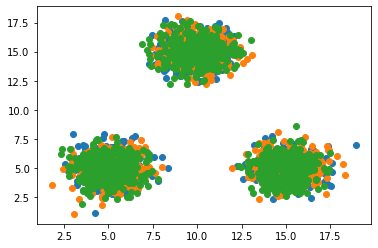

601   [33.76, 33.85, 33.88, 33.88, 33.92]
602   [33.76, 33.85, 33.88, 33.88, 33.92]
603   [33.76, 33.85, 33.88, 33.88, 33.92]
604   [33.76, 33.85, 33.88, 33.88, 33.92]
605   [33.76, 33.85, 33.88, 33.88, 33.91]
606   [33.76, 33.82, 33.85, 33.88, 33.88]
607   [33.76, 33.82, 33.85, 33.88, 33.88]
608   [33.76, 33.82, 33.85, 33.88, 33.88]
609   [33.76, 33.82, 33.85, 33.88, 33.88]
610   [33.76, 33.82, 33.85, 33.88, 33.88]
611   [33.76, 33.82, 33.85, 33.88, 33.88]
612   [33.76, 33.82, 33.85, 33.88, 33.88]
613   [33.76, 33.82, 33.85, 33.88, 33.88]
614   [33.76, 33.82, 33.85, 33.86, 33.88]
615   [33.76, 33.82, 33.85, 33.86, 33.88]
616   [33.76, 33.82, 33.85, 33.86, 33.88]
617   [33.76, 33.82, 33.85, 33.86, 33.88]
618   [33.76, 33.82, 33.85, 33.86, 33.88]
619   [33.76, 33.82, 33.85, 33.86, 33.88]
620   [33.76, 33.82, 33.85, 33.86, 33.88]


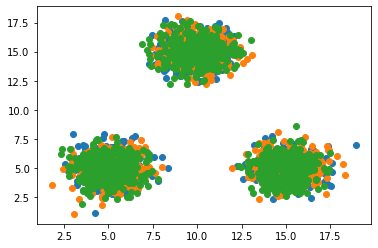

621   [33.76, 33.82, 33.85, 33.86, 33.88]
622   [33.76, 33.82, 33.85, 33.86, 33.87]
623   [33.76, 33.82, 33.85, 33.86, 33.87]
624   [33.76, 33.82, 33.85, 33.86, 33.87]
625   [33.76, 33.82, 33.85, 33.86, 33.87]
626   [33.76, 33.82, 33.85, 33.86, 33.87]
627   [33.76, 33.82, 33.85, 33.86, 33.87]
628   [33.76, 33.82, 33.85, 33.86, 33.87]
629   [33.76, 33.82, 33.85, 33.86, 33.87]
630   [33.76, 33.82, 33.85, 33.86, 33.87]
631   [33.76, 33.82, 33.85, 33.86, 33.87]
632   [33.76, 33.82, 33.85, 33.86, 33.87]
633   [33.76, 33.82, 33.85, 33.86, 33.87]
634   [33.76, 33.82, 33.85, 33.86, 33.87]
635   [33.76, 33.82, 33.85, 33.86, 33.87]
636   [33.76, 33.82, 33.85, 33.86, 33.87]
637   [33.76, 33.82, 33.85, 33.86, 33.87]
638   [33.76, 33.82, 33.85, 33.86, 33.87]
639   [33.76, 33.82, 33.85, 33.86, 33.87]
640   [33.76, 33.82, 33.85, 33.86, 33.87]


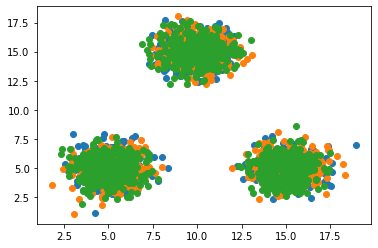

641   [33.76, 33.82, 33.85, 33.86, 33.87]
642   [33.76, 33.82, 33.85, 33.86, 33.87]
643   [33.76, 33.82, 33.85, 33.86, 33.87]
644   [33.76, 33.82, 33.85, 33.86, 33.87]
645   [33.76, 33.82, 33.85, 33.86, 33.87]
646   [33.76, 33.82, 33.85, 33.86, 33.87]
647   [33.76, 33.82, 33.85, 33.86, 33.87]
648   [33.76, 33.82, 33.85, 33.86, 33.87]
649   [33.76, 33.82, 33.85, 33.86, 33.87]
650   [33.76, 33.82, 33.85, 33.86, 33.87]
651   [33.76, 33.82, 33.85, 33.85, 33.86]
652   [33.76, 33.81, 33.82, 33.85, 33.85]
653   [33.76, 33.81, 33.82, 33.85, 33.85]
654   [33.76, 33.81, 33.82, 33.83, 33.85]
655   [33.76, 33.81, 33.82, 33.83, 33.85]
656   [33.76, 33.81, 33.82, 33.83, 33.85]
657   [33.76, 33.81, 33.82, 33.83, 33.85]
658   [33.76, 33.81, 33.82, 33.83, 33.85]
659   [33.76, 33.81, 33.82, 33.83, 33.85]
660   [33.76, 33.81, 33.82, 33.83, 33.85]


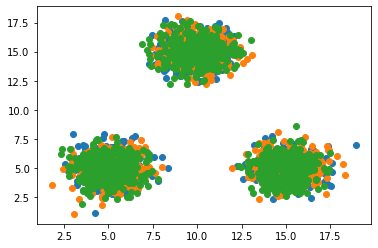

661   [33.76, 33.81, 33.82, 33.83, 33.85]
662   [33.76, 33.81, 33.82, 33.83, 33.85]
663   [33.76, 33.81, 33.82, 33.83, 33.85]
664   [33.76, 33.81, 33.82, 33.83, 33.85]
665   [33.76, 33.81, 33.82, 33.83, 33.85]
666   [33.76, 33.81, 33.82, 33.83, 33.85]
667   [33.76, 33.81, 33.82, 33.83, 33.85]
668   [33.76, 33.81, 33.82, 33.83, 33.85]
669   [33.72, 33.76, 33.81, 33.81, 33.82]
670   [33.72, 33.76, 33.81, 33.81, 33.82]
671   [33.72, 33.76, 33.81, 33.81, 33.82]
672   [33.72, 33.76, 33.81, 33.81, 33.82]
673   [33.67, 33.72, 33.76, 33.81, 33.81]
674   [33.67, 33.72, 33.76, 33.81, 33.81]
675   [33.67, 33.72, 33.76, 33.81, 33.81]
676   [33.67, 33.72, 33.76, 33.81, 33.81]
677   [33.67, 33.72, 33.76, 33.81, 33.81]
678   [33.67, 33.72, 33.76, 33.81, 33.81]
679   [33.67, 33.72, 33.76, 33.81, 33.81]
680   [33.67, 33.72, 33.76, 33.81, 33.81]


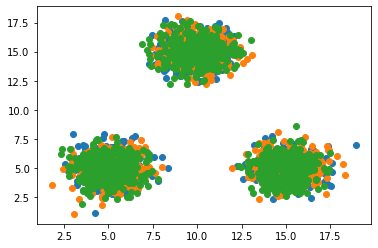

681   [33.67, 33.72, 33.76, 33.81, 33.81]
682   [33.67, 33.72, 33.75, 33.76, 33.81]
683   [33.67, 33.72, 33.75, 33.76, 33.81]
684   [33.67, 33.72, 33.73, 33.75, 33.76]
685   [33.67, 33.69, 33.72, 33.73, 33.75]
686   [33.67, 33.69, 33.72, 33.73, 33.75]
687   [33.67, 33.69, 33.72, 33.73, 33.75]
688   [33.67, 33.69, 33.72, 33.73, 33.75]
689   [33.67, 33.69, 33.72, 33.73, 33.75]
690   [33.67, 33.69, 33.72, 33.73, 33.75]
691   [33.67, 33.69, 33.72, 33.73, 33.75]
692   [33.67, 33.69, 33.72, 33.73, 33.75]
693   [33.67, 33.69, 33.72, 33.73, 33.75]
694   [33.67, 33.69, 33.72, 33.73, 33.75]
695   [33.67, 33.69, 33.72, 33.73, 33.75]
696   [33.67, 33.69, 33.72, 33.73, 33.75]
697   [33.67, 33.69, 33.72, 33.73, 33.75]
698   [33.67, 33.69, 33.72, 33.73, 33.75]
699   [33.67, 33.69, 33.72, 33.73, 33.75]
700   [33.67, 33.69, 33.72, 33.73, 33.75]


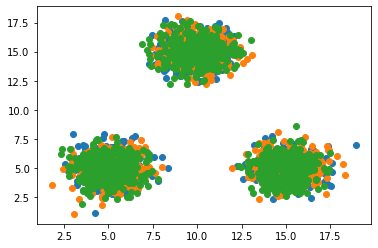

701   [33.67, 33.69, 33.72, 33.73, 33.75]
702   [33.67, 33.69, 33.72, 33.73, 33.75]
703   [33.67, 33.69, 33.72, 33.73, 33.75]
704   [33.65, 33.67, 33.69, 33.72, 33.73]
705   [33.65, 33.67, 33.69, 33.72, 33.73]
706   [33.65, 33.67, 33.69, 33.72, 33.73]
707   [33.65, 33.67, 33.69, 33.72, 33.73]
708   [33.65, 33.67, 33.69, 33.72, 33.73]
709   [33.65, 33.67, 33.69, 33.72, 33.73]
710   [33.65, 33.67, 33.69, 33.71, 33.72]
711   [33.65, 33.67, 33.69, 33.71, 33.72]
712   [33.65, 33.67, 33.69, 33.71, 33.72]
713   [33.65, 33.67, 33.69, 33.71, 33.72]
714   [33.65, 33.67, 33.69, 33.71, 33.72]
715   [33.65, 33.67, 33.69, 33.71, 33.72]
716   [33.65, 33.67, 33.69, 33.71, 33.72]
717   [33.65, 33.67, 33.69, 33.71, 33.72]
718   [33.65, 33.67, 33.69, 33.69, 33.71]
719   [33.65, 33.67, 33.67, 33.69, 33.69]
720   [33.65, 33.67, 33.67, 33.69, 33.69]


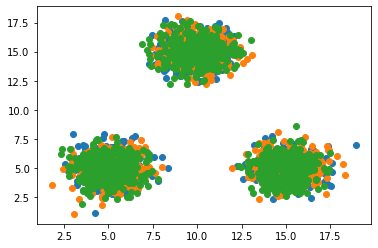

721   [33.65, 33.67, 33.67, 33.69, 33.69]
722   [33.65, 33.67, 33.67, 33.69, 33.69]
723   [33.65, 33.67, 33.67, 33.69, 33.69]
724   [33.65, 33.67, 33.67, 33.69, 33.69]
725   [33.59, 33.65, 33.67, 33.67, 33.69]
726   [33.59, 33.65, 33.67, 33.67, 33.69]
727   [33.59, 33.65, 33.67, 33.67, 33.69]
728   [33.53, 33.59, 33.65, 33.67, 33.67]
729   [33.53, 33.59, 33.65, 33.67, 33.67]
730   [33.53, 33.59, 33.65, 33.67, 33.67]
731   [33.53, 33.59, 33.65, 33.67, 33.67]
732   [33.53, 33.59, 33.65, 33.67, 33.67]
733   [33.53, 33.59, 33.65, 33.67, 33.67]
734   [33.53, 33.59, 33.65, 33.67, 33.67]
735   [33.53, 33.59, 33.65, 33.67, 33.67]
736   [33.53, 33.59, 33.65, 33.67, 33.67]
737   [33.53, 33.59, 33.65, 33.67, 33.67]
738   [33.53, 33.59, 33.65, 33.67, 33.67]
739   [33.53, 33.59, 33.65, 33.67, 33.67]
740   [33.53, 33.59, 33.61, 33.65, 33.67]


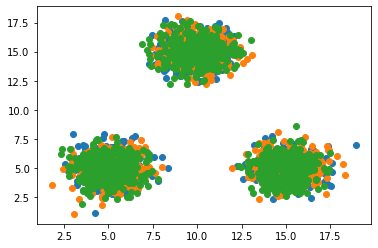

741   [33.53, 33.59, 33.61, 33.65, 33.67]
742   [33.53, 33.59, 33.61, 33.65, 33.67]
743   [33.53, 33.59, 33.61, 33.65, 33.67]
744   [33.53, 33.59, 33.61, 33.65, 33.67]
745   [33.53, 33.59, 33.61, 33.65, 33.67]
746   [33.53, 33.59, 33.61, 33.65, 33.67]
747   [33.53, 33.59, 33.61, 33.65, 33.67]
748   [33.53, 33.59, 33.61, 33.65, 33.67]
749   [33.53, 33.59, 33.61, 33.65, 33.67]
750   [33.53, 33.59, 33.61, 33.65, 33.67]
751   [33.53, 33.59, 33.61, 33.64, 33.65]
752   [33.53, 33.59, 33.61, 33.64, 33.65]
753   [33.53, 33.59, 33.61, 33.64, 33.65]
754   [33.53, 33.59, 33.61, 33.64, 33.65]
755   [33.53, 33.53, 33.59, 33.61, 33.64]
756   [33.53, 33.53, 33.59, 33.61, 33.64]
757   [33.53, 33.53, 33.59, 33.6, 33.61]
758   [33.53, 33.53, 33.59, 33.6, 33.61]
759   [33.53, 33.53, 33.59, 33.6, 33.61]
760   [33.53, 33.53, 33.59, 33.6, 33.61]


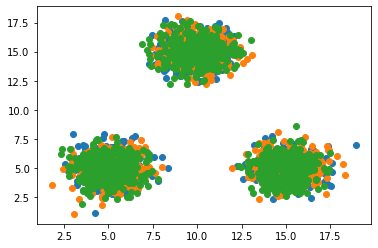

761   [33.53, 33.53, 33.58, 33.59, 33.6]
762   [33.53, 33.53, 33.58, 33.59, 33.6]
763   [33.53, 33.53, 33.58, 33.59, 33.6]
764   [33.53, 33.53, 33.58, 33.59, 33.6]
765   [33.53, 33.53, 33.58, 33.59, 33.6]
766   [33.53, 33.53, 33.58, 33.59, 33.6]
767   [33.48, 33.53, 33.53, 33.58, 33.59]
768   [33.48, 33.53, 33.53, 33.58, 33.59]
769   [33.48, 33.53, 33.53, 33.58, 33.59]
770   [33.48, 33.53, 33.53, 33.58, 33.59]
771   [33.48, 33.53, 33.53, 33.58, 33.59]
772   [33.48, 33.53, 33.53, 33.58, 33.59]
773   [33.48, 33.53, 33.53, 33.58, 33.59]
774   [33.48, 33.53, 33.53, 33.58, 33.59]
775   [33.48, 33.53, 33.53, 33.58, 33.59]
776   [33.48, 33.53, 33.53, 33.58, 33.59]
777   [33.48, 33.53, 33.53, 33.58, 33.59]
778   [33.42, 33.48, 33.53, 33.53, 33.58]
779   [33.41, 33.42, 33.48, 33.53, 33.53]
780   [33.41, 33.42, 33.48, 33.53, 33.53]


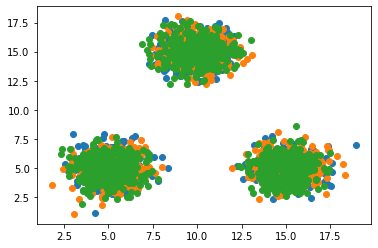

781   [33.41, 33.42, 33.48, 33.53, 33.53]
782   [33.41, 33.42, 33.48, 33.51, 33.53]
783   [33.41, 33.42, 33.48, 33.51, 33.51]
784   [33.41, 33.42, 33.48, 33.51, 33.51]
785   [33.41, 33.42, 33.48, 33.51, 33.51]
786   [33.41, 33.42, 33.48, 33.51, 33.51]
787   [33.41, 33.42, 33.48, 33.5, 33.51]
788   [33.41, 33.42, 33.48, 33.5, 33.51]
789   [33.41, 33.42, 33.48, 33.48, 33.5]
790   [33.41, 33.42, 33.48, 33.48, 33.5]
791   [33.39, 33.41, 33.42, 33.48, 33.48]
792   [33.39, 33.41, 33.42, 33.48, 33.48]
793   [33.39, 33.41, 33.42, 33.48, 33.48]
794   [33.39, 33.41, 33.42, 33.48, 33.48]
795   [33.39, 33.41, 33.42, 33.48, 33.48]
796   [33.39, 33.41, 33.42, 33.48, 33.48]
797   [33.39, 33.41, 33.42, 33.48, 33.48]
798   [33.39, 33.41, 33.42, 33.48, 33.48]
799   [33.39, 33.41, 33.42, 33.48, 33.48]
800   [33.39, 33.41, 33.42, 33.48, 33.48]


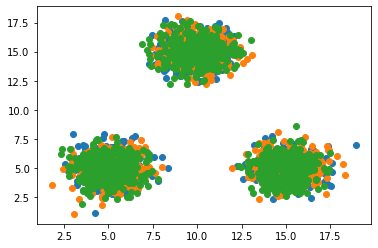

801   [33.37, 33.39, 33.41, 33.42, 33.48]
802   [33.37, 33.39, 33.41, 33.42, 33.48]
803   [33.37, 33.39, 33.41, 33.42, 33.48]
804   [33.37, 33.39, 33.41, 33.42, 33.48]
805   [33.37, 33.39, 33.41, 33.42, 33.48]
806   [33.37, 33.39, 33.41, 33.42, 33.48]
807   [33.37, 33.39, 33.41, 33.42, 33.48]
808   [33.37, 33.39, 33.41, 33.42, 33.48]
809   [33.37, 33.39, 33.41, 33.42, 33.48]
810   [33.37, 33.39, 33.41, 33.42, 33.48]
811   [33.37, 33.39, 33.41, 33.42, 33.48]
812   [33.37, 33.39, 33.41, 33.42, 33.48]
813   [33.37, 33.39, 33.41, 33.42, 33.48]
814   [33.37, 33.39, 33.41, 33.42, 33.48]
815   [33.37, 33.39, 33.41, 33.42, 33.48]
816   [33.37, 33.39, 33.41, 33.42, 33.48]
817   [33.37, 33.39, 33.41, 33.42, 33.48]
818   [33.37, 33.39, 33.41, 33.42, 33.48]
819   [33.37, 33.39, 33.41, 33.42, 33.48]
820   [33.37, 33.39, 33.41, 33.42, 33.48]


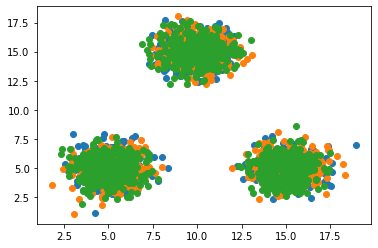

821   [33.37, 33.39, 33.41, 33.42, 33.48]
822   [33.37, 33.39, 33.41, 33.42, 33.48]
823   [33.37, 33.39, 33.41, 33.42, 33.48]
824   [33.37, 33.39, 33.41, 33.42, 33.48]
825   [33.37, 33.39, 33.41, 33.42, 33.48]
826   [33.37, 33.39, 33.41, 33.42, 33.48]
827   [33.37, 33.39, 33.41, 33.42, 33.48]
828   [33.33, 33.37, 33.39, 33.41, 33.42]
829   [33.33, 33.37, 33.39, 33.41, 33.42]
830   [33.33, 33.37, 33.39, 33.41, 33.42]
831   [33.33, 33.37, 33.39, 33.41, 33.42]
832   [33.33, 33.37, 33.39, 33.41, 33.42]
833   [33.33, 33.37, 33.39, 33.41, 33.42]
834   [33.33, 33.37, 33.39, 33.41, 33.42]
835   [33.33, 33.37, 33.39, 33.41, 33.42]
836   [33.33, 33.37, 33.39, 33.41, 33.42]
837   [33.33, 33.37, 33.39, 33.41, 33.42]
838   [33.33, 33.37, 33.39, 33.41, 33.42]
839   [33.33, 33.37, 33.39, 33.41, 33.42]
840   [33.33, 33.37, 33.39, 33.41, 33.42]


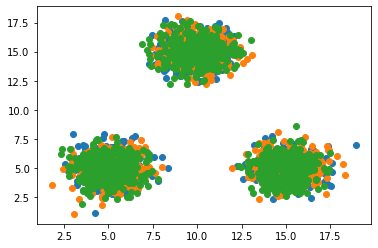

841   [33.33, 33.37, 33.39, 33.41, 33.42]
842   [33.33, 33.37, 33.39, 33.41, 33.42]
843   [33.33, 33.37, 33.39, 33.41, 33.42]
844   [33.33, 33.37, 33.39, 33.41, 33.42]
845   [33.33, 33.37, 33.39, 33.41, 33.42]
846   [33.33, 33.37, 33.39, 33.41, 33.42]
847   [33.33, 33.37, 33.39, 33.41, 33.42]
848   [33.33, 33.37, 33.39, 33.41, 33.42]
849   [33.33, 33.37, 33.39, 33.41, 33.42]
850   [33.33, 33.37, 33.39, 33.41, 33.42]
851   [33.33, 33.37, 33.39, 33.41, 33.42]
852   [33.33, 33.37, 33.39, 33.41, 33.42]
853   [33.33, 33.37, 33.37, 33.39, 33.41]
854   [33.33, 33.37, 33.37, 33.39, 33.41]
855   [33.33, 33.37, 33.37, 33.39, 33.41]
856   [33.33, 33.37, 33.37, 33.39, 33.41]
857   [33.33, 33.37, 33.37, 33.39, 33.41]
858   [33.33, 33.37, 33.37, 33.39, 33.41]
859   [33.33, 33.37, 33.37, 33.39, 33.41]
860   [33.33, 33.37, 33.37, 33.39, 33.41]


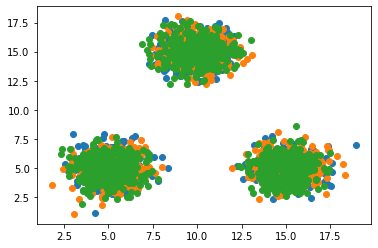

861   [33.33, 33.37, 33.37, 33.39, 33.41]
862   [33.33, 33.37, 33.37, 33.39, 33.41]
863   [33.33, 33.37, 33.37, 33.39, 33.41]
864   [33.33, 33.37, 33.37, 33.39, 33.41]
865   [33.32, 33.33, 33.37, 33.37, 33.39]
866   [33.22, 33.32, 33.33, 33.37, 33.37]
867   [33.22, 33.32, 33.33, 33.37, 33.37]
868   [33.22, 33.32, 33.33, 33.37, 33.37]
869   [33.22, 33.32, 33.33, 33.37, 33.37]
870   [33.22, 33.32, 33.33, 33.37, 33.37]
871   [33.22, 33.32, 33.33, 33.37, 33.37]
872   [33.22, 33.32, 33.33, 33.37, 33.37]
873   [33.22, 33.32, 33.33, 33.37, 33.37]
874   [33.22, 33.32, 33.33, 33.37, 33.37]
875   [33.22, 33.32, 33.33, 33.37, 33.37]
876   [33.22, 33.32, 33.33, 33.37, 33.37]
877   [33.22, 33.32, 33.33, 33.37, 33.37]
878   [33.22, 33.32, 33.33, 33.37, 33.37]
879   [33.22, 33.32, 33.33, 33.37, 33.37]
880   [33.22, 33.32, 33.33, 33.37, 33.37]


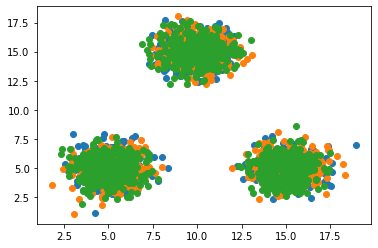

881   [33.22, 33.24, 33.27, 33.32, 33.33]
882   [33.22, 33.24, 33.27, 33.32, 33.33]
883   [33.22, 33.24, 33.27, 33.32, 33.33]
884   [33.22, 33.24, 33.27, 33.32, 33.32]
885   [33.22, 33.24, 33.27, 33.32, 33.32]
886   [33.22, 33.24, 33.27, 33.32, 33.32]
887   [33.22, 33.24, 33.27, 33.32, 33.32]
888   [33.22, 33.24, 33.27, 33.32, 33.32]
889   [33.22, 33.24, 33.27, 33.32, 33.32]
890   [33.22, 33.24, 33.27, 33.32, 33.32]
891   [33.22, 33.24, 33.27, 33.32, 33.32]
892   [33.22, 33.24, 33.27, 33.32, 33.32]
893   [33.22, 33.24, 33.27, 33.32, 33.32]
894   [33.22, 33.24, 33.27, 33.32, 33.32]
895   [33.22, 33.24, 33.27, 33.32, 33.32]
896   [33.22, 33.24, 33.27, 33.32, 33.32]
897   [33.22, 33.24, 33.27, 33.29, 33.32]
898   [33.22, 33.24, 33.27, 33.29, 33.32]
899   [33.22, 33.24, 33.27, 33.29, 33.32]
900   [33.22, 33.24, 33.27, 33.29, 33.32]


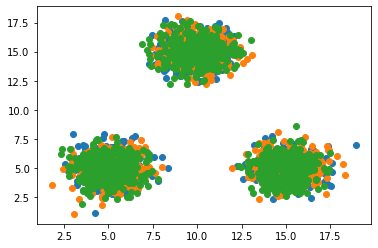

901   [33.22, 33.24, 33.27, 33.29, 33.32]
902   [33.22, 33.24, 33.27, 33.29, 33.32]
903   [33.22, 33.24, 33.27, 33.29, 33.32]
904   [33.22, 33.24, 33.27, 33.29, 33.32]
905   [33.22, 33.24, 33.27, 33.29, 33.32]
906   [33.22, 33.24, 33.27, 33.29, 33.32]
907   [33.22, 33.24, 33.27, 33.29, 33.32]
908   [33.22, 33.24, 33.27, 33.29, 33.32]
909   [33.22, 33.24, 33.27, 33.29, 33.32]
910   [33.22, 33.24, 33.27, 33.29, 33.32]
911   [33.22, 33.24, 33.27, 33.29, 33.3]
912   [33.22, 33.24, 33.27, 33.29, 33.3]
913   [33.22, 33.24, 33.27, 33.29, 33.3]
914   [33.22, 33.24, 33.27, 33.29, 33.3]
915   [33.22, 33.24, 33.27, 33.29, 33.3]
916   [33.22, 33.24, 33.27, 33.29, 33.3]
917   [33.22, 33.24, 33.27, 33.29, 33.3]
918   [33.22, 33.24, 33.27, 33.29, 33.3]
919   [33.22, 33.24, 33.27, 33.29, 33.3]
920   [33.22, 33.24, 33.27, 33.29, 33.3]


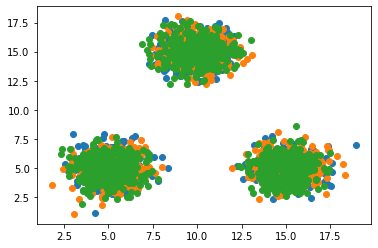

921   [33.22, 33.24, 33.27, 33.29, 33.3]
922   [33.22, 33.24, 33.27, 33.29, 33.3]
923   [33.22, 33.24, 33.27, 33.29, 33.3]
924   [33.22, 33.24, 33.27, 33.29, 33.3]
925   [33.22, 33.24, 33.27, 33.29, 33.3]
926   [33.22, 33.24, 33.27, 33.29, 33.3]
927   [33.2, 33.22, 33.24, 33.27, 33.29]
928   [33.2, 33.22, 33.24, 33.27, 33.29]
929   [33.2, 33.22, 33.24, 33.27, 33.29]
930   [33.2, 33.22, 33.24, 33.27, 33.29]
931   [33.2, 33.22, 33.24, 33.27, 33.29]
932   [33.2, 33.22, 33.24, 33.27, 33.29]
933   [33.2, 33.22, 33.24, 33.27, 33.29]
934   [33.2, 33.22, 33.24, 33.27, 33.27]
935   [33.2, 33.22, 33.24, 33.27, 33.27]
936   [33.2, 33.22, 33.24, 33.27, 33.27]
937   [33.2, 33.22, 33.24, 33.27, 33.27]
938   [33.2, 33.22, 33.24, 33.27, 33.27]
939   [33.2, 33.22, 33.24, 33.27, 33.27]
940   [33.2, 33.22, 33.24, 33.27, 33.27]


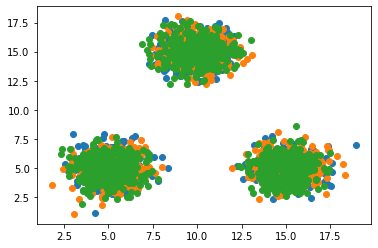

941   [33.2, 33.22, 33.24, 33.27, 33.27]
942   [33.2, 33.22, 33.24, 33.27, 33.27]
943   [33.2, 33.22, 33.24, 33.27, 33.27]
944   [33.2, 33.22, 33.24, 33.27, 33.27]
945   [33.2, 33.22, 33.24, 33.27, 33.27]
946   [33.2, 33.22, 33.24, 33.27, 33.27]
947   [33.2, 33.22, 33.24, 33.27, 33.27]
948   [33.2, 33.22, 33.24, 33.27, 33.27]
949   [33.2, 33.22, 33.24, 33.27, 33.27]
950   [33.2, 33.22, 33.24, 33.27, 33.27]
951   [33.2, 33.22, 33.24, 33.27, 33.27]
952   [33.2, 33.22, 33.24, 33.27, 33.27]
953   [33.2, 33.22, 33.24, 33.27, 33.27]
954   [33.2, 33.22, 33.24, 33.27, 33.27]
955   [33.2, 33.22, 33.24, 33.27, 33.27]
956   [33.2, 33.22, 33.24, 33.27, 33.27]
957   [33.18, 33.2, 33.22, 33.24, 33.27]
958   [33.18, 33.2, 33.22, 33.24, 33.27]
959   [33.18, 33.2, 33.22, 33.24, 33.27]
960   [33.18, 33.2, 33.22, 33.24, 33.27]


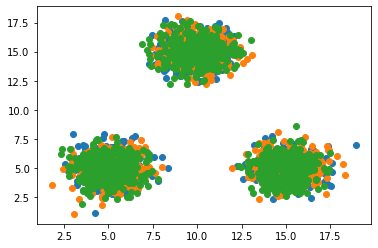

961   [33.18, 33.2, 33.22, 33.24, 33.27]
962   [33.18, 33.2, 33.22, 33.24, 33.27]
963   [33.18, 33.2, 33.22, 33.24, 33.27]
964   [33.18, 33.2, 33.22, 33.24, 33.27]
965   [33.18, 33.2, 33.22, 33.24, 33.27]
966   [33.18, 33.2, 33.22, 33.24, 33.27]
967   [33.18, 33.2, 33.22, 33.24, 33.27]
968   [33.18, 33.2, 33.22, 33.24, 33.27]
969   [33.18, 33.2, 33.22, 33.24, 33.27]
970   [33.18, 33.2, 33.22, 33.24, 33.27]
971   [33.18, 33.2, 33.22, 33.24, 33.27]
972   [33.18, 33.2, 33.22, 33.24, 33.27]
973   [33.18, 33.2, 33.22, 33.24, 33.27]
974   [33.18, 33.2, 33.22, 33.24, 33.27]
975   [33.11, 33.18, 33.2, 33.22, 33.24]
976   [33.11, 33.18, 33.2, 33.22, 33.24]
977   [33.11, 33.18, 33.2, 33.22, 33.24]
978   [33.11, 33.18, 33.2, 33.22, 33.24]
979   [33.11, 33.18, 33.2, 33.22, 33.24]
980   [33.11, 33.18, 33.2, 33.22, 33.24]


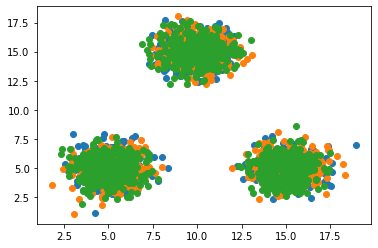

981   [33.11, 33.18, 33.2, 33.22, 33.24]
982   [33.11, 33.18, 33.2, 33.22, 33.24]
983   [33.11, 33.18, 33.2, 33.22, 33.24]
984   [33.11, 33.18, 33.2, 33.22, 33.24]
985   [33.11, 33.18, 33.2, 33.22, 33.24]
986   [33.11, 33.18, 33.2, 33.22, 33.24]
987   [33.11, 33.18, 33.2, 33.22, 33.24]
988   [33.11, 33.18, 33.2, 33.22, 33.24]
989   [33.11, 33.18, 33.2, 33.22, 33.24]
990   [33.11, 33.18, 33.2, 33.22, 33.24]
991   [33.11, 33.18, 33.2, 33.22, 33.24]
992   [33.11, 33.18, 33.2, 33.22, 33.24]
993   [33.11, 33.18, 33.2, 33.22, 33.24]
994   [33.11, 33.18, 33.2, 33.22, 33.24]
995   [33.11, 33.18, 33.2, 33.22, 33.24]
996   [33.11, 33.18, 33.2, 33.22, 33.24]
997   [33.11, 33.18, 33.2, 33.22, 33.24]
998   [33.11, 33.18, 33.2, 33.22, 33.24]
999   [33.11, 33.18, 33.2, 33.22, 33.24]


In [ ]:
popul = []
val = []

for i in range(npopul):
  popul.append(createBot())
  
for it in range(epohs): 
  
  val = [ErrorBot(bot) for bot in popul]
  
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)

  print(it, " ", [round(i,2) for i in sval[0:5]])
  if (it % 20 == 0):     # Каждую 20-ую эпоху 
    for i in range(count_class):
      plotPoints = points[bot==i,:]
      plt.scatter(plotPoints[:,0], plotPoints[:,1])
    plt.show()

  for i in range(nnew):  # Создаем новых ботов
    
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []
    
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0,2)
      
      newbot.append(x)
      
    newbot = np.array(newbot)
    newpopul.append(newbot)
    
  popul = newpopul

Как видно результат неудовлетворительный. Поэтому надо применять другие способы подсчета ошибки.

In [137]:
def getErrorPoints(x, cls, data):
  data_error = []
  for i in range(count_class):
    if (i != cls):
      data_error.extend(list(points[i,:]))   # data_error.extend(list(data[i,:]))

  dist = [getDistanceError(x, i) for i in data_error]
  min_dist = min(dist)
  return 1/(min_dist + 1e-5)
  

In [138]:
# Общая ошибка
def ErrorBot(bot):
  center = []

  for i in range(count_class):
    DataClass = points[bot==i,:]
    center.append(np.mean(DataClass,axis=0))

  sum_error = 0
  for i in range(n):
    cen = center[bot[i]]
    error = getDistanceError(points[i], cen)
    error *= getDistancePoints(points[i], bot[i], points)
    error *= getErrorPoints(points[i], bot[i], points)
    sum_error += error

  sum_error /= points.shape[0]
  return sum_error

## 1000 точек каждого класса

0   [77.99, 78.08, 78.74, 80.82, 81.22]


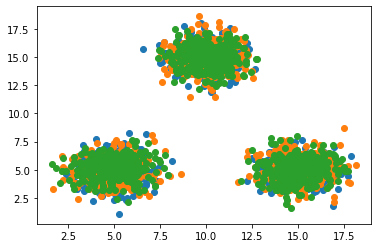

1   [77.7, 77.82, 77.87, 77.9, 77.91]
2   [71.91, 72.94, 75.58, 76.03, 76.31]
3   [64.15, 70.71, 70.95, 71.33, 71.91]
4   [53.22, 60.21, 63.8, 64.15, 65.31]
5   [52.61, 53.22, 53.24, 53.3, 54.97]
6   [51.79, 52.31, 52.35, 52.54, 52.6]
7   [51.13, 51.79, 51.86, 51.88, 52.0]
8   [49.39, 49.87, 50.59, 50.67, 50.81]
9   [48.56, 49.34, 49.35, 49.39, 49.6]
10   [46.07, 48.2, 48.56, 48.67, 48.83]
11   [45.62, 46.07, 46.91, 47.07, 47.15]
12   [43.9, 44.56, 45.62, 45.96, 46.07]
13   [43.9, 43.9, 44.08, 44.56, 44.66]
14   [43.13, 43.77, 43.79, 43.85, 43.9]
15   [41.8, 41.9, 42.04, 42.68, 42.93]
16   [41.39, 41.8, 41.9, 41.92, 41.98]
17   [41.02, 41.15, 41.39, 41.47, 41.5]
18   [40.62, 40.72, 40.93, 41.02, 41.07]
19   [39.55, 40.12, 40.39, 40.41, 40.56]
20   [39.49, 39.55, 39.61, 39.62, 39.77]


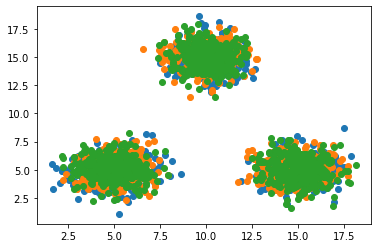

21   [38.91, 39.14, 39.21, 39.49, 39.55]
22   [38.23, 38.5, 38.68, 38.91, 39.09]
23   [37.82, 38.23, 38.45, 38.48, 38.5]
24   [37.82, 38.23, 38.27, 38.29, 38.37]
25   [37.06, 37.37, 37.48, 37.54, 37.55]
26   [36.66, 36.89, 37.06, 37.33, 37.37]
27   [35.59, 35.99, 36.31, 36.34, 36.37]
28   [35.59, 35.76, 35.81, 35.82, 35.99]
29   [35.32, 35.51, 35.55, 35.59, 35.6]
30   [35.32, 35.38, 35.38, 35.4, 35.47]
31   [35.04, 35.09, 35.11, 35.13, 35.16]
32   [34.74, 34.85, 34.95, 35.01, 35.02]
33   [34.64, 34.74, 34.79, 34.85, 34.92]
34   [34.41, 34.47, 34.49, 34.55, 34.62]
35   [34.32, 34.33, 34.33, 34.36, 34.37]
36   [33.22, 33.35, 33.59, 33.91, 33.92]
37   [32.66, 33.09, 33.16, 33.2, 33.22]
38   [32.66, 32.8, 32.85, 32.94, 33.09]
39   [32.6, 32.66, 32.69, 32.69, 32.76]
40   [32.34, 32.43, 32.43, 32.54, 32.55]


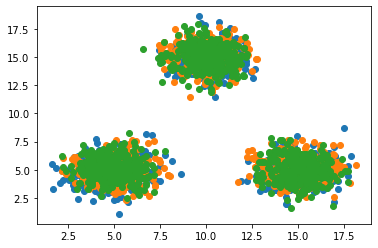

41   [32.31, 32.34, 32.43, 32.43, 32.48]
42   [31.98, 32.13, 32.16, 32.22, 32.31]
43   [31.98, 32.13, 32.13, 32.14, 32.15]
44   [31.62, 31.96, 31.97, 31.98, 31.99]
45   [31.58, 31.62, 31.66, 31.68, 31.89]
46   [31.07, 31.44, 31.58, 31.58, 31.62]
47   [30.61, 31.06, 31.07, 31.17, 31.21]
48   [30.61, 30.78, 30.81, 30.89, 30.93]
49   [30.08, 30.61, 30.62, 30.7, 30.71]
50   [30.08, 30.13, 30.17, 30.27, 30.3]
51   [29.89, 30.0, 30.07, 30.08, 30.13]
52   [29.85, 29.86, 29.89, 30.0, 30.07]
53   [29.66, 29.69, 29.69, 29.85, 29.86]
54   [29.26, 29.45, 29.66, 29.69, 29.69]
55   [29.26, 29.33, 29.34, 29.34, 29.45]
56   [29.26, 29.33, 29.34, 29.34, 29.38]
57   [29.07, 29.18, 29.26, 29.27, 29.31]
58   [28.97, 28.97, 29.07, 29.09, 29.09]
59   [28.84, 28.9, 28.97, 28.97, 29.07]
60   [28.78, 28.84, 28.9, 28.91, 28.95]


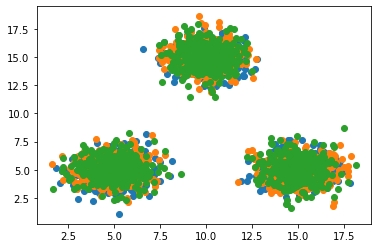

61   [28.72, 28.78, 28.84, 28.89, 28.9]
62   [28.19, 28.54, 28.58, 28.59, 28.6]
63   [28.19, 28.23, 28.51, 28.54, 28.58]
64   [28.17, 28.19, 28.23, 28.32, 28.45]
65   [28.04, 28.14, 28.17, 28.19, 28.23]
66   [27.54, 27.86, 28.03, 28.04, 28.07]
67   [27.29, 27.54, 27.86, 27.97, 27.97]
68   [26.97, 27.16, 27.2, 27.29, 27.42]
69   [26.53, 26.88, 26.97, 27.04, 27.13]
70   [26.53, 26.58, 26.88, 26.9, 26.94]
71   [26.43, 26.53, 26.58, 26.58, 26.6]
72   [26.21, 26.24, 26.36, 26.43, 26.53]
73   [25.79, 26.21, 26.24, 26.36, 26.4]
74   [25.79, 25.91, 26.02, 26.21, 26.22]
75   [25.79, 25.79, 25.84, 25.89, 25.91]
76   [25.63, 25.69, 25.79, 25.79, 25.82]
77   [25.49, 25.63, 25.69, 25.69, 25.73]
78   [25.34, 25.49, 25.55, 25.63, 25.69]
79   [25.34, 25.49, 25.52, 25.55, 25.6]
80   [25.24, 25.26, 25.33, 25.34, 25.48]


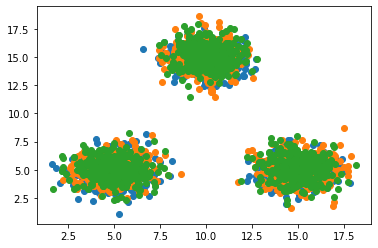

81   [25.24, 25.26, 25.33, 25.34, 25.38]
82   [25.24, 25.26, 25.33, 25.34, 25.34]
83   [25.19, 25.24, 25.26, 25.33, 25.33]
84   [25.16, 25.16, 25.19, 25.19, 25.24]
85   [24.89, 25.04, 25.09, 25.1, 25.16]
86   [24.8, 24.89, 24.89, 25.01, 25.04]
87   [24.69, 24.8, 24.85, 24.86, 24.89]
88   [24.69, 24.8, 24.82, 24.84, 24.85]
89   [24.57, 24.69, 24.8, 24.82, 24.84]
90   [24.57, 24.69, 24.71, 24.76, 24.78]
91   [24.44, 24.57, 24.57, 24.61, 24.62]
92   [24.44, 24.53, 24.57, 24.57, 24.61]
93   [24.42, 24.43, 24.44, 24.53, 24.57]
94   [24.39, 24.42, 24.43, 24.43, 24.44]
95   [24.26, 24.31, 24.33, 24.34, 24.39]
96   [24.19, 24.26, 24.31, 24.31, 24.33]
97   [24.19, 24.22, 24.26, 24.26, 24.29]
98   [24.02, 24.08, 24.11, 24.19, 24.19]
99   [23.8, 24.02, 24.08, 24.11, 24.11]
100   [23.8, 23.86, 23.98, 24.02, 24.02]


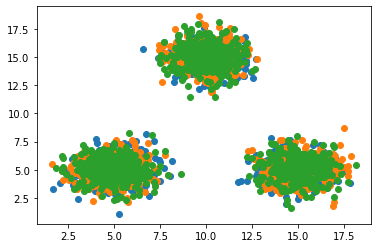

101   [23.66, 23.8, 23.86, 23.87, 23.91]
102   [23.66, 23.8, 23.84, 23.86, 23.87]
103   [23.6, 23.66, 23.74, 23.75, 23.75]
104   [23.6, 23.66, 23.66, 23.74, 23.75]
105   [23.57, 23.6, 23.61, 23.62, 23.66]
106   [23.43, 23.45, 23.57, 23.6, 23.61]
107   [23.37, 23.43, 23.45, 23.56, 23.56]
108   [23.34, 23.37, 23.38, 23.41, 23.43]
109   [23.34, 23.37, 23.37, 23.38, 23.41]
110   [23.19, 23.25, 23.28, 23.34, 23.36]
111   [23.19, 23.21, 23.25, 23.26, 23.28]
112   [23.13, 23.19, 23.21, 23.22, 23.24]
113   [22.86, 23.13, 23.19, 23.21, 23.22]
114   [22.86, 23.13, 23.16, 23.19, 23.21]
115   [22.37, 22.74, 22.86, 23.06, 23.06]
116   [22.37, 22.67, 22.74, 22.86, 22.95]
117   [22.37, 22.6, 22.61, 22.67, 22.74]
118   [22.37, 22.51, 22.6, 22.61, 22.67]
119   [22.37, 22.38, 22.51, 22.56, 22.59]
120   [22.37, 22.38, 22.39, 22.43, 22.51]


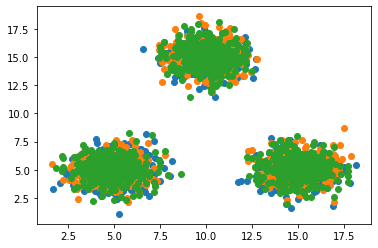

121   [22.37, 22.38, 22.39, 22.43, 22.48]
122   [22.37, 22.38, 22.39, 22.43, 22.47]
123   [22.28, 22.36, 22.37, 22.38, 22.39]
124   [22.16, 22.28, 22.32, 22.33, 22.36]
125   [21.82, 22.15, 22.16, 22.17, 22.28]
126   [21.8, 21.82, 21.99, 22.0, 22.15]
127   [21.78, 21.8, 21.82, 21.93, 21.94]
128   [21.7, 21.78, 21.79, 21.8, 21.82]
129   [21.7, 21.78, 21.79, 21.8, 21.8]
130   [21.66, 21.7, 21.77, 21.78, 21.79]
131   [21.66, 21.7, 21.75, 21.76, 21.77]
132   [21.66, 21.7, 21.75, 21.76, 21.77]
133   [21.5, 21.66, 21.7, 21.75, 21.76]
134   [21.5, 21.63, 21.66, 21.68, 21.7]
135   [21.5, 21.63, 21.66, 21.67, 21.68]
136   [21.5, 21.63, 21.66, 21.67, 21.67]
137   [21.48, 21.5, 21.56, 21.63, 21.63]
138   [21.41, 21.48, 21.5, 21.56, 21.57]
139   [21.41, 21.41, 21.45, 21.46, 21.48]
140   [21.33, 21.35, 21.41, 21.41, 21.45]


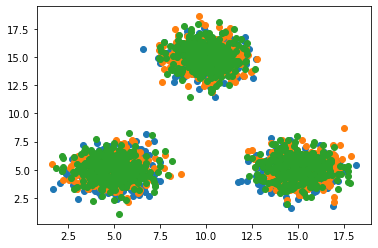

141   [21.33, 21.35, 21.4, 21.41, 21.41]
142   [21.2, 21.29, 21.33, 21.35, 21.37]
143   [21.2, 21.29, 21.33, 21.35, 21.37]
144   [21.2, 21.29, 21.3, 21.33, 21.35]
145   [21.05, 21.2, 21.29, 21.3, 21.33]
146   [20.93, 21.05, 21.2, 21.28, 21.29]
147   [20.91, 20.93, 21.05, 21.2, 21.24]
148   [20.9, 20.91, 20.93, 20.95, 21.05]
149   [20.86, 20.9, 20.91, 20.93, 20.93]
150   [20.86, 20.9, 20.91, 20.93, 20.93]
151   [20.74, 20.84, 20.86, 20.9, 20.9]
152   [20.66, 20.74, 20.84, 20.86, 20.86]
153   [20.61, 20.66, 20.74, 20.75, 20.79]
154   [20.61, 20.66, 20.74, 20.75, 20.79]
155   [20.54, 20.56, 20.61, 20.66, 20.69]
156   [20.34, 20.52, 20.54, 20.54, 20.56]
157   [20.34, 20.44, 20.52, 20.54, 20.54]
158   [20.34, 20.44, 20.52, 20.54, 20.54]
159   [20.34, 20.4, 20.44, 20.52, 20.52]
160   [20.24, 20.34, 20.4, 20.44, 20.52]


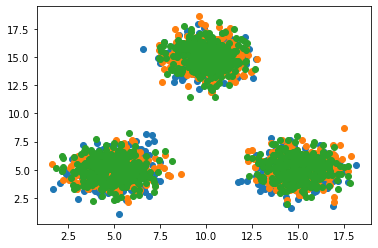

161   [20.18, 20.24, 20.31, 20.34, 20.4]
162   [20.18, 20.24, 20.29, 20.31, 20.34]
163   [20.18, 20.24, 20.29, 20.31, 20.34]
164   [20.18, 20.2, 20.24, 20.29, 20.31]
165   [20.14, 20.18, 20.2, 20.24, 20.26]
166   [20.14, 20.18, 20.18, 20.2, 20.23]
167   [19.96, 20.1, 20.14, 20.18, 20.18]
168   [19.96, 19.98, 20.1, 20.11, 20.14]
169   [19.96, 19.98, 20.1, 20.11, 20.14]
170   [19.93, 19.96, 19.98, 20.02, 20.04]
171   [19.89, 19.92, 19.93, 19.96, 19.98]
172   [19.87, 19.89, 19.92, 19.93, 19.96]
173   [19.87, 19.89, 19.92, 19.93, 19.94]
174   [19.87, 19.89, 19.92, 19.92, 19.93]
175   [19.87, 19.89, 19.92, 19.92, 19.93]
176   [19.68, 19.82, 19.87, 19.87, 19.89]
177   [19.68, 19.74, 19.8, 19.82, 19.82]
178   [19.68, 19.71, 19.74, 19.75, 19.8]
179   [19.65, 19.68, 19.71, 19.73, 19.74]
180   [19.63, 19.63, 19.65, 19.68, 19.71]


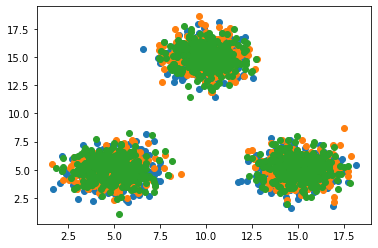

181   [19.56, 19.63, 19.63, 19.64, 19.65]
182   [19.56, 19.63, 19.63, 19.64, 19.65]
183   [19.38, 19.56, 19.63, 19.63, 19.64]
184   [19.38, 19.56, 19.63, 19.63, 19.64]
185   [19.38, 19.38, 19.56, 19.57, 19.63]
186   [19.38, 19.38, 19.46, 19.51, 19.56]
187   [19.33, 19.38, 19.38, 19.46, 19.51]
188   [19.33, 19.34, 19.38, 19.38, 19.46]
189   [19.33, 19.34, 19.38, 19.38, 19.46]
190   [19.31, 19.33, 19.34, 19.38, 19.38]
191   [19.26, 19.31, 19.33, 19.34, 19.37]
192   [19.23, 19.26, 19.31, 19.33, 19.34]
193   [19.2, 19.23, 19.26, 19.26, 19.31]
194   [19.2, 19.22, 19.23, 19.26, 19.26]
195   [19.18, 19.2, 19.2, 19.22, 19.22]
196   [19.18, 19.18, 19.2, 19.2, 19.2]
197   [19.12, 19.18, 19.18, 19.19, 19.2]
198   [19.05, 19.12, 19.16, 19.18, 19.18]
199   [19.05, 19.12, 19.15, 19.16, 19.18]
200   [18.91, 19.05, 19.07, 19.12, 19.15]


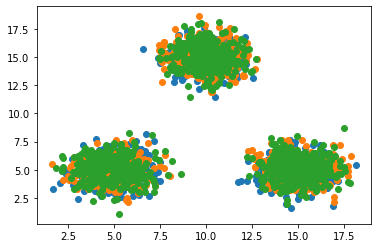

201   [18.91, 18.94, 19.05, 19.07, 19.08]
202   [18.88, 18.91, 18.94, 19.03, 19.05]
203   [18.85, 18.88, 18.91, 18.94, 18.94]
204   [18.84, 18.85, 18.88, 18.91, 18.94]
205   [18.5, 18.84, 18.84, 18.85, 18.88]
206   [18.5, 18.76, 18.84, 18.84, 18.85]
207   [18.5, 18.63, 18.76, 18.84, 18.84]
208   [18.5, 18.59, 18.63, 18.75, 18.76]
209   [18.5, 18.59, 18.63, 18.75, 18.76]
210   [18.5, 18.59, 18.61, 18.63, 18.7]
211   [18.5, 18.59, 18.61, 18.63, 18.68]
212   [18.5, 18.51, 18.58, 18.59, 18.61]
213   [18.5, 18.51, 18.58, 18.59, 18.6]
214   [18.5, 18.51, 18.51, 18.52, 18.58]
215   [18.5, 18.51, 18.51, 18.52, 18.52]
216   [18.5, 18.51, 18.51, 18.52, 18.52]
217   [18.4, 18.5, 18.51, 18.51, 18.52]
218   [18.4, 18.5, 18.51, 18.51, 18.52]
219   [18.4, 18.5, 18.51, 18.51, 18.51]
220   [18.4, 18.4, 18.48, 18.5, 18.51]


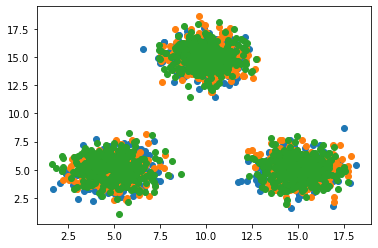

221   [18.39, 18.4, 18.4, 18.48, 18.48]
222   [18.39, 18.4, 18.4, 18.48, 18.48]
223   [18.39, 18.4, 18.4, 18.44, 18.48]
224   [18.09, 18.39, 18.39, 18.4, 18.4]
225   [18.09, 18.39, 18.39, 18.4, 18.4]
226   [18.01, 18.09, 18.38, 18.38, 18.39]
227   [18.01, 18.09, 18.11, 18.11, 18.12]
228   [18.01, 18.04, 18.09, 18.11, 18.11]
229   [18.01, 18.04, 18.09, 18.09, 18.11]
230   [17.87, 18.01, 18.04, 18.09, 18.09]
231   [17.87, 18.01, 18.04, 18.09, 18.09]
232   [17.87, 18.01, 18.04, 18.06, 18.09]
233   [17.87, 17.95, 18.0, 18.01, 18.04]
234   [17.87, 17.95, 18.0, 18.01, 18.04]
235   [17.87, 17.95, 17.96, 18.0, 18.01]
236   [17.87, 17.95, 17.95, 17.96, 17.97]
237   [17.87, 17.95, 17.95, 17.96, 17.97]
238   [17.87, 17.9, 17.95, 17.95, 17.96]
239   [17.87, 17.9, 17.93, 17.95, 17.95]
240   [17.82, 17.87, 17.9, 17.93, 17.95]


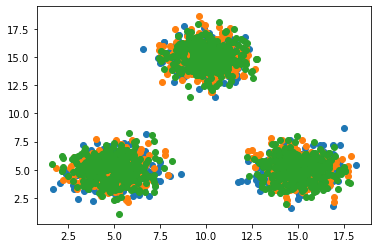

241   [17.82, 17.82, 17.87, 17.9, 17.93]
242   [17.82, 17.82, 17.87, 17.9, 17.92]
243   [17.82, 17.82, 17.87, 17.9, 17.92]
244   [17.82, 17.82, 17.87, 17.9, 17.92]
245   [17.74, 17.76, 17.82, 17.82, 17.84]
246   [17.74, 17.76, 17.82, 17.82, 17.84]
247   [17.67, 17.74, 17.76, 17.82, 17.82]
248   [17.67, 17.74, 17.76, 17.78, 17.82]
249   [17.67, 17.73, 17.74, 17.76, 17.78]
250   [17.67, 17.68, 17.73, 17.74, 17.76]
251   [17.64, 17.67, 17.68, 17.73, 17.74]
252   [17.64, 17.67, 17.68, 17.73, 17.74]
253   [17.54, 17.64, 17.67, 17.68, 17.71]
254   [17.54, 17.61, 17.64, 17.67, 17.68]
255   [17.54, 17.61, 17.64, 17.67, 17.68]
256   [17.54, 17.61, 17.64, 17.66, 17.67]
257   [17.54, 17.54, 17.61, 17.61, 17.64]
258   [17.47, 17.53, 17.54, 17.54, 17.55]
259   [17.47, 17.53, 17.54, 17.54, 17.55]
260   [17.47, 17.48, 17.52, 17.53, 17.54]


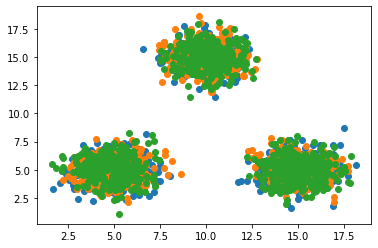

261   [17.45, 17.47, 17.48, 17.5, 17.51]
262   [17.45, 17.47, 17.48, 17.5, 17.5]
263   [17.45, 17.47, 17.48, 17.5, 17.5]
264   [17.38, 17.41, 17.45, 17.47, 17.48]
265   [17.38, 17.41, 17.45, 17.47, 17.48]
266   [17.02, 17.3, 17.38, 17.39, 17.4]
267   [17.02, 17.3, 17.38, 17.39, 17.4]
268   [17.02, 17.15, 17.23, 17.3, 17.38]
269   [17.02, 17.15, 17.23, 17.26, 17.3]
270   [17.02, 17.15, 17.23, 17.26, 17.28]
271   [17.02, 17.08, 17.12, 17.15, 17.23]
272   [17.02, 17.08, 17.12, 17.15, 17.23]
273   [17.02, 17.05, 17.06, 17.08, 17.12]
274   [17.02, 17.05, 17.06, 17.08, 17.1]
275   [17.02, 17.05, 17.06, 17.08, 17.1]
276   [17.02, 17.05, 17.05, 17.06, 17.08]
277   [16.86, 17.02, 17.05, 17.05, 17.06]
278   [16.82, 16.86, 16.94, 17.02, 17.05]
279   [16.82, 16.86, 16.94, 16.94, 17.01]
280   [16.82, 16.86, 16.86, 16.94, 16.94]


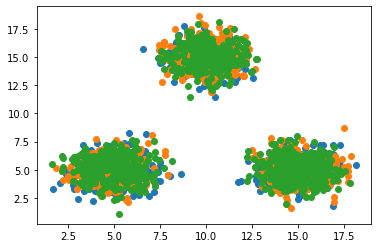

281   [16.82, 16.84, 16.86, 16.86, 16.94]
282   [16.82, 16.84, 16.86, 16.86, 16.94]
283   [16.82, 16.84, 16.86, 16.86, 16.94]
284   [16.82, 16.84, 16.86, 16.86, 16.94]
285   [16.82, 16.82, 16.82, 16.84, 16.86]
286   [16.82, 16.82, 16.82, 16.84, 16.86]
287   [16.82, 16.82, 16.82, 16.84, 16.86]
288   [16.77, 16.82, 16.82, 16.82, 16.84]
289   [16.77, 16.82, 16.82, 16.82, 16.82]
290   [16.77, 16.79, 16.82, 16.82, 16.82]
291   [16.72, 16.77, 16.79, 16.82, 16.82]
292   [16.72, 16.77, 16.79, 16.8, 16.82]
293   [16.72, 16.76, 16.77, 16.79, 16.8]
294   [16.67, 16.72, 16.76, 16.77, 16.79]
295   [16.67, 16.72, 16.76, 16.77, 16.79]
296   [16.67, 16.72, 16.76, 16.77, 16.79]
297   [16.63, 16.67, 16.72, 16.76, 16.77]
298   [16.63, 16.67, 16.7, 16.7, 16.72]
299   [16.63, 16.67, 16.7, 16.7, 16.72]
300   [16.63, 16.64, 16.67, 16.7, 16.7]


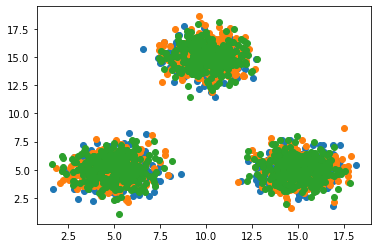

301   [16.63, 16.64, 16.67, 16.67, 16.7]
302   [16.63, 16.64, 16.67, 16.67, 16.7]
303   [16.63, 16.64, 16.67, 16.67, 16.7]
304   [16.62, 16.63, 16.64, 16.67, 16.67]
305   [16.62, 16.63, 16.64, 16.67, 16.67]
306   [16.55, 16.62, 16.63, 16.64, 16.67]
307   [16.51, 16.55, 16.62, 16.62, 16.63]
308   [16.51, 16.51, 16.55, 16.62, 16.62]
309   [16.51, 16.51, 16.55, 16.6, 16.62]
310   [16.48, 16.51, 16.51, 16.55, 16.6]
311   [16.48, 16.48, 16.51, 16.51, 16.55]
312   [16.48, 16.48, 16.51, 16.51, 16.55]
313   [16.4, 16.44, 16.48, 16.48, 16.48]
314   [16.4, 16.44, 16.48, 16.48, 16.48]
315   [16.4, 16.44, 16.48, 16.48, 16.48]
316   [16.4, 16.44, 16.48, 16.48, 16.48]
317   [16.36, 16.4, 16.42, 16.44, 16.48]
318   [16.32, 16.36, 16.4, 16.42, 16.44]
319   [16.32, 16.36, 16.4, 16.41, 16.42]
320   [16.32, 16.35, 16.36, 16.4, 16.41]


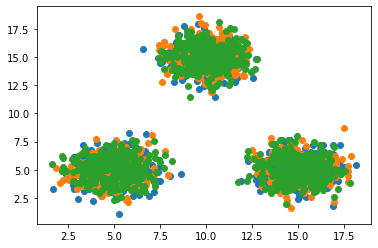

321   [16.18, 16.32, 16.35, 16.36, 16.4]
322   [16.18, 16.32, 16.35, 16.36, 16.37]
323   [16.18, 16.32, 16.32, 16.32, 16.35]
324   [16.18, 16.32, 16.32, 16.32, 16.32]
325   [16.18, 16.27, 16.32, 16.32, 16.32]
326   [16.18, 16.22, 16.27, 16.32, 16.32]
327   [16.18, 16.22, 16.25, 16.27, 16.32]
328   [16.18, 16.22, 16.25, 16.26, 16.27]
329   [16.18, 16.22, 16.22, 16.25, 16.26]
330   [16.18, 16.22, 16.22, 16.25, 16.26]
331   [16.12, 16.18, 16.18, 16.22, 16.22]
332   [16.12, 16.15, 16.18, 16.18, 16.22]
333   [16.12, 16.15, 16.18, 16.18, 16.22]
334   [16.11, 16.12, 16.15, 16.18, 16.18]
335   [16.11, 16.12, 16.15, 16.15, 16.16]
336   [16.02, 16.1, 16.11, 16.12, 16.15]
337   [16.02, 16.1, 16.11, 16.12, 16.15]
338   [16.02, 16.04, 16.1, 16.11, 16.12]
339   [16.02, 16.04, 16.1, 16.11, 16.11]
340   [16.02, 16.04, 16.09, 16.1, 16.1]


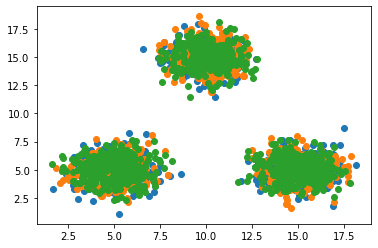

341   [16.02, 16.02, 16.04, 16.09, 16.1]
342   [16.02, 16.02, 16.04, 16.09, 16.1]
343   [16.02, 16.02, 16.04, 16.04, 16.09]
344   [16.0, 16.01, 16.02, 16.02, 16.04]
345   [15.91, 16.0, 16.01, 16.02, 16.02]
346   [15.91, 16.0, 16.01, 16.02, 16.02]
347   [15.91, 16.0, 16.01, 16.02, 16.02]
348   [15.91, 16.0, 16.01, 16.02, 16.02]
349   [15.91, 16.0, 16.01, 16.02, 16.02]
350   [15.91, 16.0, 16.01, 16.02, 16.02]
351   [15.91, 16.0, 16.01, 16.02, 16.02]
352   [15.91, 15.95, 15.98, 16.0, 16.01]
353   [15.91, 15.95, 15.98, 16.0, 16.01]
354   [15.91, 15.95, 15.98, 16.0, 16.0]
355   [15.91, 15.95, 15.95, 15.98, 16.0]
356   [15.91, 15.95, 15.95, 15.98, 15.99]
357   [15.91, 15.95, 15.95, 15.96, 15.98]
358   [15.91, 15.92, 15.95, 15.95, 15.96]
359   [15.91, 15.92, 15.95, 15.95, 15.96]
360   [15.91, 15.92, 15.95, 15.95, 15.96]


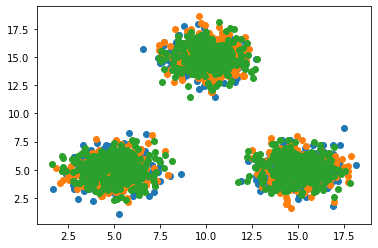

361   [15.82, 15.91, 15.92, 15.93, 15.95]
362   [15.71, 15.82, 15.91, 15.92, 15.93]
363   [15.71, 15.82, 15.91, 15.92, 15.93]
364   [15.71, 15.82, 15.91, 15.92, 15.93]
365   [15.71, 15.82, 15.9, 15.9, 15.91]
366   [15.71, 15.82, 15.85, 15.86, 15.9]
367   [15.71, 15.82, 15.85, 15.86, 15.9]
368   [15.71, 15.82, 15.85, 15.85, 15.86]
369   [15.71, 15.82, 15.85, 15.85, 15.85]
370   [15.71, 15.8, 15.82, 15.85, 15.85]
371   [15.71, 15.79, 15.8, 15.82, 15.85]
372   [15.71, 15.79, 15.8, 15.82, 15.85]
373   [15.61, 15.71, 15.77, 15.79, 15.8]
374   [15.61, 15.71, 15.77, 15.79, 15.8]
375   [15.61, 15.71, 15.77, 15.79, 15.8]
376   [15.61, 15.7, 15.71, 15.71, 15.77]
377   [15.61, 15.7, 15.71, 15.71, 15.77]
378   [15.61, 15.7, 15.71, 15.71, 15.77]
379   [15.61, 15.66, 15.7, 15.71, 15.71]
380   [15.61, 15.66, 15.7, 15.71, 15.71]


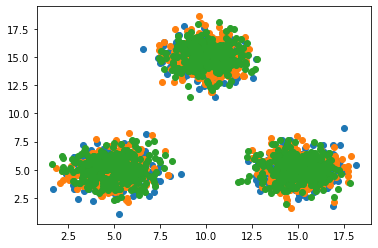

381   [15.61, 15.66, 15.7, 15.71, 15.71]
382   [15.61, 15.66, 15.7, 15.71, 15.71]
383   [15.61, 15.66, 15.68, 15.7, 15.71]
384   [15.59, 15.61, 15.66, 15.68, 15.7]
385   [15.59, 15.61, 15.66, 15.68, 15.69]
386   [15.59, 15.61, 15.66, 15.68, 15.69]
387   [15.59, 15.61, 15.66, 15.68, 15.69]
388   [15.59, 15.61, 15.66, 15.68, 15.69]
389   [15.59, 15.61, 15.66, 15.68, 15.68]
390   [15.59, 15.61, 15.65, 15.66, 15.67]
391   [15.48, 15.59, 15.61, 15.65, 15.66]
392   [15.48, 15.59, 15.61, 15.62, 15.65]
393   [15.48, 15.59, 15.61, 15.62, 15.65]
394   [15.48, 15.59, 15.61, 15.62, 15.65]
395   [15.48, 15.59, 15.59, 15.61, 15.62]
396   [15.44, 15.48, 15.59, 15.59, 15.6]
397   [15.44, 15.48, 15.59, 15.59, 15.6]
398   [15.44, 15.48, 15.57, 15.57, 15.58]
399   [15.44, 15.48, 15.57, 15.57, 15.58]
400   [15.44, 15.48, 15.57, 15.57, 15.58]


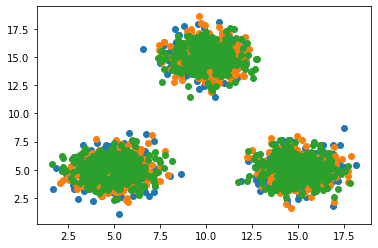

401   [15.44, 15.46, 15.48, 15.49, 15.57]
402   [15.44, 15.46, 15.48, 15.49, 15.57]
403   [15.36, 15.44, 15.46, 15.48, 15.48]
404   [15.36, 15.44, 15.46, 15.48, 15.48]
405   [15.36, 15.44, 15.46, 15.48, 15.48]
406   [15.36, 15.44, 15.46, 15.48, 15.48]
407   [15.36, 15.44, 15.46, 15.48, 15.48]
408   [15.36, 15.44, 15.45, 15.46, 15.48]
409   [15.36, 15.43, 15.44, 15.45, 15.46]
410   [15.36, 15.43, 15.44, 15.45, 15.46]
411   [15.36, 15.43, 15.44, 15.45, 15.46]
412   [15.36, 15.43, 15.44, 15.45, 15.46]
413   [15.36, 15.43, 15.44, 15.45, 15.46]
414   [15.36, 15.43, 15.44, 15.45, 15.46]
415   [15.36, 15.43, 15.44, 15.45, 15.46]
416   [15.36, 15.37, 15.43, 15.44, 15.45]
417   [15.29, 15.36, 15.37, 15.4, 15.43]
418   [15.29, 15.36, 15.37, 15.4, 15.43]
419   [15.29, 15.36, 15.37, 15.39, 15.4]
420   [15.29, 15.36, 15.37, 15.39, 15.4]


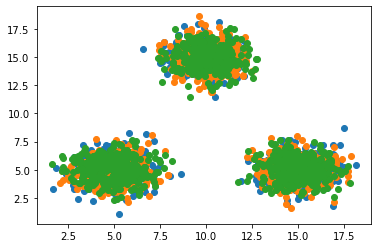

421   [15.29, 15.35, 15.36, 15.37, 15.39]
422   [15.29, 15.35, 15.36, 15.37, 15.39]
423   [15.29, 15.35, 15.36, 15.37, 15.37]
424   [15.29, 15.35, 15.36, 15.37, 15.37]
425   [15.29, 15.35, 15.36, 15.36, 15.37]
426   [15.29, 15.35, 15.36, 15.36, 15.37]
427   [15.29, 15.35, 15.36, 15.36, 15.37]
428   [15.29, 15.35, 15.36, 15.36, 15.37]
429   [15.22, 15.29, 15.35, 15.36, 15.36]
430   [15.18, 15.22, 15.29, 15.35, 15.36]
431   [15.18, 15.22, 15.29, 15.35, 15.36]
432   [15.18, 15.22, 15.29, 15.35, 15.36]
433   [15.18, 15.22, 15.29, 15.31, 15.33]
434   [15.12, 15.18, 15.2, 15.22, 15.22]
435   [15.12, 15.18, 15.2, 15.22, 15.22]
436   [15.12, 15.18, 15.18, 15.2, 15.22]
437   [15.12, 15.18, 15.18, 15.2, 15.22]
438   [15.12, 15.18, 15.18, 15.2, 15.22]
439   [15.12, 15.18, 15.18, 15.2, 15.22]
440   [15.12, 15.18, 15.18, 15.19, 15.2]


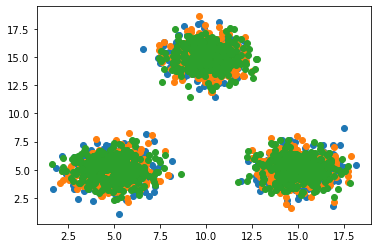

441   [15.12, 15.18, 15.18, 15.19, 15.2]
442   [15.12, 15.18, 15.18, 15.18, 15.19]
443   [15.12, 15.18, 15.18, 15.18, 15.19]
444   [15.12, 15.18, 15.18, 15.18, 15.19]
445   [15.12, 15.17, 15.18, 15.18, 15.18]
446   [15.12, 15.17, 15.18, 15.18, 15.18]
447   [15.0, 15.12, 15.17, 15.18, 15.18]
448   [15.0, 15.12, 15.17, 15.18, 15.18]
449   [15.0, 15.12, 15.15, 15.17, 15.18]
450   [15.0, 15.12, 15.15, 15.17, 15.18]
451   [15.0, 15.08, 15.12, 15.14, 15.15]
452   [15.0, 15.08, 15.12, 15.14, 15.15]
453   [15.0, 15.06, 15.08, 15.12, 15.14]
454   [15.0, 15.06, 15.08, 15.09, 15.12]
455   [14.9, 15.0, 15.06, 15.08, 15.09]
456   [14.9, 15.0, 15.06, 15.08, 15.09]
457   [14.9, 15.0, 15.06, 15.08, 15.09]
458   [14.9, 15.0, 15.06, 15.08, 15.09]
459   [14.9, 15.0, 15.06, 15.08, 15.09]
460   [14.9, 15.0, 15.05, 15.06, 15.08]


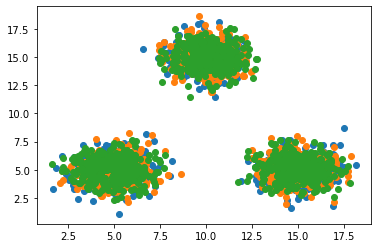

461   [14.9, 15.0, 15.05, 15.05, 15.06]
462   [14.9, 15.0, 15.05, 15.05, 15.05]
463   [14.9, 15.0, 15.05, 15.05, 15.05]
464   [14.9, 15.0, 15.05, 15.05, 15.05]
465   [14.9, 15.0, 15.05, 15.05, 15.05]
466   [14.9, 14.99, 15.0, 15.05, 15.05]
467   [14.9, 14.99, 15.0, 15.04, 15.05]
468   [14.9, 14.99, 15.0, 15.03, 15.04]
469   [14.87, 14.9, 14.96, 14.98, 14.99]
470   [14.87, 14.9, 14.96, 14.98, 14.99]
471   [14.87, 14.9, 14.96, 14.98, 14.99]
472   [14.87, 14.9, 14.96, 14.98, 14.99]
473   [14.87, 14.9, 14.94, 14.96, 14.98]
474   [14.87, 14.9, 14.94, 14.96, 14.98]
475   [14.87, 14.9, 14.94, 14.96, 14.98]
476   [14.87, 14.9, 14.9, 14.94, 14.95]
477   [14.87, 14.9, 14.9, 14.91, 14.94]
478   [14.87, 14.9, 14.9, 14.91, 14.91]
479   [14.85, 14.87, 14.9, 14.9, 14.91]
480   [14.85, 14.87, 14.9, 14.9, 14.91]


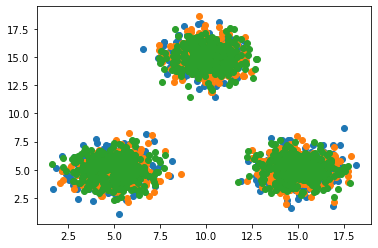

481   [14.85, 14.87, 14.9, 14.9, 14.91]
482   [14.78, 14.85, 14.87, 14.9, 14.9]
483   [14.77, 14.78, 14.85, 14.87, 14.9]
484   [14.77, 14.78, 14.85, 14.87, 14.9]
485   [14.75, 14.77, 14.78, 14.85, 14.87]
486   [14.75, 14.77, 14.78, 14.85, 14.87]
487   [14.75, 14.77, 14.78, 14.85, 14.86]
488   [14.75, 14.77, 14.78, 14.84, 14.85]
489   [14.75, 14.77, 14.78, 14.84, 14.85]
490   [14.65, 14.71, 14.74, 14.75, 14.77]
491   [14.65, 14.71, 14.74, 14.75, 14.76]
492   [14.65, 14.71, 14.74, 14.75, 14.76]
493   [14.63, 14.65, 14.71, 14.74, 14.74]
494   [14.63, 14.65, 14.71, 14.74, 14.74]
495   [14.63, 14.65, 14.71, 14.74, 14.74]
496   [14.63, 14.65, 14.71, 14.74, 14.74]
497   [14.63, 14.65, 14.68, 14.71, 14.74]
498   [14.59, 14.63, 14.65, 14.68, 14.71]
499   [14.59, 14.63, 14.65, 14.68, 14.71]


In [168]:
npopul = 100         #  Размер популяции
nsurv = 20           #  Число выживших ботов
nnew = npopul-nsurv  #  Новых ботов
l = 3000             #  Генов у бота
mut = 0.02           #  Коэффициент мутации
epohs = 500          #  Эпохи


popul = []
val = []

for i in range(npopul):
  popul.append(createBot())
  
for it in range(epohs): # Проходим по каждой эпохе
  
  val = [ErrorBot(bot) for bot in popul] # Считаем ошибку каждого бота
  
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Возвращаем новую популяцию из выживших и сортированный список из ошибок лучших ботов

  print(it, " ", [round(i,2) for i in sval[0:5]])     # Выводим информацию 
  if (it % 20 == 0):     # Каждую 20-ую эпоху 
    for i in range(count_class):
      plotPoints = points[newpopul[0]==i,:]
      plt.scatter(plotPoints[:,0], plotPoints[:,1])
    plt.show()

  for i in range(nnew):  # Создаем новых ботов
    
    botp1, botp2 = getParents(newpopul, nsurv) # Получаем родителей
    newbot = [] # Создаем пустой список для генов нового бота
    
    for j in range(l): # Проходим по всем генам
      x = crossPointFrom2Parents(botp1, botp2, j) # Возвращаем ген
      if (random.random() < mut): # Создаем случайное число и, если оно меньше коэффициента мутации 
        x = random.randint(0,2)   # Новый ген делаем абсолютно случайным 
      
      newbot.append(x)        # Добавляем в бота выбранный ген
      
    newbot = np.array(newbot) # Преобазуем newbot в Numpy
    newpopul.append(newbot)   # Добавляем бота в популяцию
    
  popul = newpopul # Новую популяцию делаем текущей популяцией 

## 100 точек каждого класса

In [151]:
# Создадим точки на двухмерной плоскости

count_class = 3                                     # Число классов
n = 100                                     # Количество точек каждого класса
cnt = [[5, 10], [10,15], [15,10]]             # Зададим центры каждого класса

points = []                                    # Будущий массив с точками
for i in range(count_class):                        #  Три класса
  for j in range(n):                        # По n точек в каждом классе
    x = cnt[i][0] + np.random.normal(0, 1)  # Координата x данной точки
    y = cnt[i][1] + np.random.normal(0, 1)  # Координата y данной точки
    points.append([x,y])

In [152]:
points = np.array(points)  # Первод в numpy
print(points.shape)     # Узнаем размер массива

(300, 2)


### Отображение на графике полученных точек

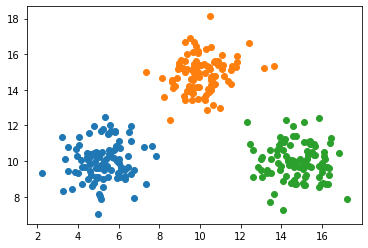

In [153]:
plt.scatter(points[:n,0], points[:n,1])
plt.scatter(points[n:n*2,0], points[n:n*2,1])
plt.scatter(points[n*2:,0], points[n*2:,1])
plt.show()

In [154]:
bot = createBot()       # Создаем бота

0   [10.74, 10.75, 10.78, 10.85, 10.91]


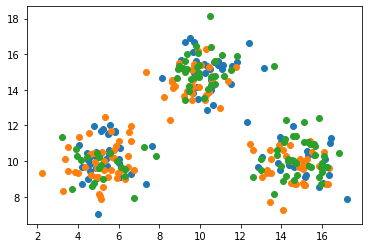

1   [10.67, 10.68, 10.7, 10.74, 10.75]
2   [10.45, 10.47, 10.53, 10.54, 10.61]
3   [10.34, 10.34, 10.38, 10.39, 10.42]
4   [10.1, 10.3, 10.31, 10.31, 10.31]
5   [9.99, 10.09, 10.1, 10.11, 10.21]
6   [9.89, 9.99, 10.05, 10.05, 10.08]
7   [9.7, 9.85, 9.85, 9.88, 9.89]
8   [9.55, 9.58, 9.59, 9.65, 9.7]
9   [9.34, 9.55, 9.55, 9.56, 9.56]
10   [9.34, 9.43, 9.47, 9.48, 9.5]
11   [9.26, 9.3, 9.33, 9.34, 9.34]
12   [9.0, 9.08, 9.18, 9.2, 9.26]
13   [8.75, 9.0, 9.04, 9.08, 9.18]
14   [8.67, 8.75, 8.76, 8.9, 8.9]
15   [8.67, 8.7, 8.75, 8.76, 8.77]
16   [8.55, 8.58, 8.63, 8.65, 8.67]
17   [8.21, 8.44, 8.53, 8.55, 8.56]
18   [8.21, 8.33, 8.34, 8.36, 8.43]
19   [8.17, 8.2, 8.21, 8.21, 8.23]
20   [8.07, 8.08, 8.17, 8.17, 8.18]


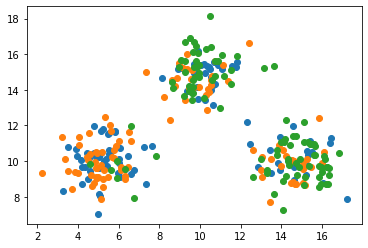

21   [7.91, 8.03, 8.03, 8.07, 8.08]
22   [7.89, 7.91, 7.91, 8.0, 8.03]
23   [7.62, 7.83, 7.84, 7.89, 7.91]
24   [7.62, 7.72, 7.75, 7.83, 7.84]
25   [7.48, 7.6, 7.62, 7.67, 7.72]
26   [7.48, 7.57, 7.58, 7.6, 7.62]
27   [7.35, 7.36, 7.46, 7.48, 7.57]
28   [7.22, 7.35, 7.36, 7.4, 7.43]
29   [7.22, 7.27, 7.35, 7.36, 7.4]
30   [7.22, 7.27, 7.33, 7.35, 7.36]
31   [7.22, 7.27, 7.33, 7.35, 7.36]
32   [7.17, 7.22, 7.25, 7.27, 7.28]
33   [7.17, 7.2, 7.22, 7.25, 7.27]
34   [7.17, 7.2, 7.22, 7.24, 7.25]
35   [7.17, 7.17, 7.2, 7.22, 7.23]
36   [7.12, 7.17, 7.17, 7.17, 7.2]
37   [7.06, 7.11, 7.12, 7.17, 7.17]
38   [7.06, 7.1, 7.11, 7.12, 7.12]
39   [6.74, 6.94, 7.06, 7.1, 7.11]
40   [6.74, 6.9, 6.92, 6.94, 6.99]


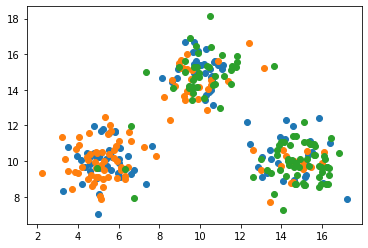

41   [6.74, 6.82, 6.85, 6.9, 6.92]
42   [6.69, 6.74, 6.82, 6.83, 6.85]
43   [6.6, 6.69, 6.74, 6.74, 6.82]
44   [6.48, 6.51, 6.52, 6.58, 6.6]
45   [6.48, 6.51, 6.52, 6.55, 6.56]
46   [6.48, 6.5, 6.51, 6.51, 6.52]
47   [6.2, 6.46, 6.47, 6.48, 6.5]
48   [6.2, 6.37, 6.38, 6.44, 6.46]
49   [6.2, 6.37, 6.37, 6.38, 6.39]
50   [6.18, 6.2, 6.29, 6.36, 6.37]
51   [6.18, 6.2, 6.27, 6.29, 6.29]
52   [6.07, 6.08, 6.17, 6.17, 6.18]
53   [6.07, 6.08, 6.08, 6.17, 6.17]
54   [5.92, 5.97, 5.99, 6.03, 6.07]
55   [5.92, 5.97, 5.99, 6.03, 6.07]
56   [5.92, 5.96, 5.97, 5.99, 6.03]
57   [5.73, 5.83, 5.92, 5.96, 5.97]
58   [5.66, 5.73, 5.83, 5.88, 5.92]
59   [5.66, 5.67, 5.73, 5.82, 5.83]
60   [5.66, 5.67, 5.73, 5.79, 5.82]


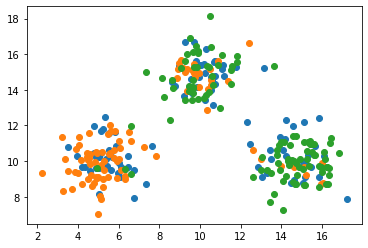

61   [5.6, 5.66, 5.67, 5.73, 5.79]
62   [5.27, 5.29, 5.5, 5.6, 5.62]
63   [5.27, 5.29, 5.29, 5.38, 5.49]
64   [5.27, 5.29, 5.29, 5.33, 5.38]
65   [5.27, 5.29, 5.29, 5.33, 5.38]
66   [5.27, 5.29, 5.29, 5.33, 5.38]
67   [5.1, 5.27, 5.29, 5.29, 5.33]
68   [5.1, 5.25, 5.27, 5.29, 5.29]
69   [5.1, 5.17, 5.21, 5.25, 5.27]
70   [5.1, 5.1, 5.15, 5.17, 5.21]
71   [5.04, 5.09, 5.1, 5.1, 5.15]
72   [5.04, 5.07, 5.09, 5.1, 5.1]
73   [5.04, 5.05, 5.07, 5.09, 5.1]
74   [5.04, 5.05, 5.07, 5.09, 5.1]
75   [4.99, 5.04, 5.04, 5.05, 5.07]
76   [4.99, 5.04, 5.04, 5.05, 5.07]
77   [4.99, 5.01, 5.03, 5.04, 5.04]
78   [4.99, 5.01, 5.03, 5.04, 5.04]
79   [4.99, 5.01, 5.03, 5.04, 5.04]
80   [4.99, 5.01, 5.03, 5.04, 5.04]


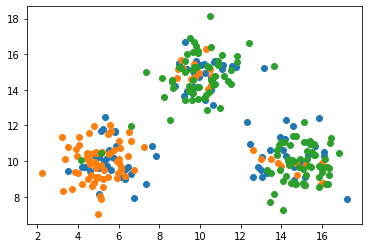

81   [4.99, 5.01, 5.01, 5.03, 5.04]
82   [4.99, 4.99, 5.01, 5.01, 5.03]
83   [4.88, 4.98, 4.99, 4.99, 5.0]
84   [4.88, 4.98, 4.99, 4.99, 5.0]
85   [4.88, 4.98, 4.99, 4.99, 5.0]
86   [4.88, 4.98, 4.99, 4.99, 5.0]
87   [4.88, 4.94, 4.98, 4.98, 4.99]
88   [4.84, 4.88, 4.91, 4.94, 4.95]
89   [4.84, 4.85, 4.88, 4.91, 4.94]
90   [4.79, 4.84, 4.85, 4.88, 4.91]
91   [4.56, 4.79, 4.81, 4.84, 4.85]
92   [4.56, 4.79, 4.81, 4.82, 4.84]
93   [4.56, 4.79, 4.81, 4.82, 4.84]
94   [4.56, 4.66, 4.79, 4.81, 4.82]
95   [4.56, 4.66, 4.79, 4.81, 4.82]
96   [4.56, 4.66, 4.69, 4.74, 4.79]
97   [4.56, 4.66, 4.69, 4.69, 4.74]
98   [4.56, 4.66, 4.69, 4.69, 4.71]
99   [4.56, 4.65, 4.66, 4.69, 4.69]
100   [4.56, 4.65, 4.66, 4.69, 4.69]


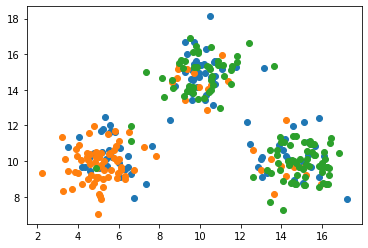

101   [4.56, 4.65, 4.66, 4.66, 4.69]
102   [4.56, 4.64, 4.65, 4.66, 4.66]
103   [4.52, 4.53, 4.56, 4.6, 4.64]
104   [4.34, 4.46, 4.52, 4.52, 4.53]
105   [4.34, 4.35, 4.46, 4.52, 4.52]
106   [4.29, 4.29, 4.34, 4.35, 4.38]
107   [4.21, 4.29, 4.29, 4.34, 4.35]
108   [4.17, 4.21, 4.29, 4.29, 4.33]
109   [4.16, 4.17, 4.21, 4.29, 4.29]
110   [4.16, 4.17, 4.21, 4.21, 4.29]
111   [4.16, 4.17, 4.21, 4.21, 4.29]
112   [4.16, 4.17, 4.21, 4.21, 4.29]
113   [4.16, 4.17, 4.21, 4.21, 4.29]
114   [4.13, 4.16, 4.17, 4.19, 4.21]
115   [4.12, 4.13, 4.16, 4.17, 4.19]
116   [4.12, 4.13, 4.16, 4.17, 4.19]
117   [4.12, 4.13, 4.16, 4.17, 4.19]
118   [4.12, 4.13, 4.16, 4.17, 4.18]
119   [4.02, 4.1, 4.12, 4.13, 4.16]
120   [4.02, 4.1, 4.12, 4.13, 4.13]


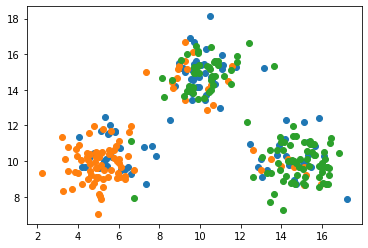

121   [4.02, 4.02, 4.1, 4.12, 4.13]
122   [4.02, 4.02, 4.1, 4.12, 4.13]
123   [4.02, 4.02, 4.1, 4.11, 4.12]
124   [4.0, 4.02, 4.02, 4.1, 4.11]
125   [4.0, 4.02, 4.02, 4.1, 4.11]
126   [3.94, 4.0, 4.02, 4.02, 4.1]
127   [3.94, 4.0, 4.02, 4.02, 4.09]
128   [3.94, 4.0, 4.0, 4.02, 4.02]
129   [3.94, 4.0, 4.0, 4.02, 4.02]
130   [3.94, 4.0, 4.0, 4.02, 4.02]
131   [3.94, 4.0, 4.0, 4.02, 4.02]
132   [3.94, 4.0, 4.0, 4.02, 4.02]
133   [3.94, 4.0, 4.0, 4.02, 4.02]
134   [3.94, 4.0, 4.0, 4.0, 4.02]
135   [3.83, 3.94, 4.0, 4.0, 4.0]
136   [3.83, 3.94, 3.96, 4.0, 4.0]
137   [3.83, 3.94, 3.96, 3.97, 4.0]
138   [3.8, 3.83, 3.87, 3.94, 3.95]
139   [3.8, 3.83, 3.85, 3.86, 3.87]
140   [3.8, 3.83, 3.85, 3.86, 3.87]


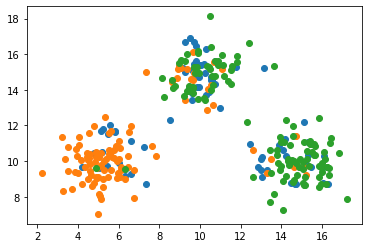

141   [3.8, 3.83, 3.85, 3.86, 3.87]
142   [3.8, 3.83, 3.83, 3.85, 3.86]
143   [3.8, 3.83, 3.83, 3.85, 3.85]
144   [3.8, 3.83, 3.83, 3.85, 3.85]
145   [3.8, 3.83, 3.83, 3.85, 3.85]
146   [3.8, 3.83, 3.83, 3.84, 3.85]
147   [3.8, 3.83, 3.83, 3.84, 3.85]
148   [3.8, 3.83, 3.83, 3.83, 3.84]
149   [3.8, 3.81, 3.83, 3.83, 3.83]
150   [3.77, 3.8, 3.81, 3.83, 3.83]
151   [3.6, 3.63, 3.77, 3.8, 3.81]
152   [3.6, 3.63, 3.77, 3.8, 3.81]
153   [3.6, 3.63, 3.77, 3.8, 3.81]
154   [3.6, 3.63, 3.66, 3.72, 3.77]
155   [3.47, 3.6, 3.63, 3.66, 3.68]
156   [3.47, 3.6, 3.63, 3.66, 3.68]
157   [3.47, 3.6, 3.63, 3.66, 3.67]
158   [3.47, 3.6, 3.6, 3.63, 3.66]
159   [3.47, 3.6, 3.6, 3.63, 3.63]
160   [3.47, 3.6, 3.6, 3.63, 3.63]


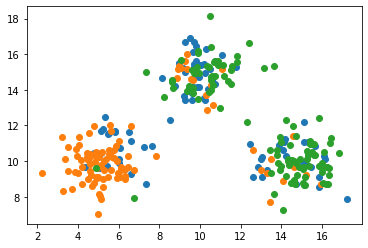

161   [3.47, 3.6, 3.6, 3.61, 3.63]
162   [3.47, 3.6, 3.6, 3.6, 3.61]
163   [3.47, 3.51, 3.6, 3.6, 3.6]
164   [3.47, 3.5, 3.51, 3.6, 3.6]
165   [3.47, 3.5, 3.51, 3.54, 3.6]
166   [3.47, 3.5, 3.51, 3.54, 3.57]
167   [3.47, 3.5, 3.51, 3.54, 3.57]
168   [3.47, 3.5, 3.51, 3.53, 3.54]
169   [3.34, 3.4, 3.47, 3.5, 3.51]
170   [3.34, 3.38, 3.4, 3.47, 3.5]
171   [3.34, 3.38, 3.4, 3.47, 3.5]
172   [3.34, 3.38, 3.4, 3.44, 3.46]
173   [3.34, 3.38, 3.4, 3.44, 3.46]
174   [3.34, 3.38, 3.4, 3.43, 3.44]
175   [3.34, 3.38, 3.38, 3.4, 3.43]
176   [3.34, 3.38, 3.38, 3.4, 3.43]
177   [3.34, 3.38, 3.38, 3.4, 3.43]
178   [3.34, 3.38, 3.38, 3.38, 3.4]
179   [3.34, 3.38, 3.38, 3.38, 3.4]
180   [3.34, 3.36, 3.38, 3.38, 3.38]


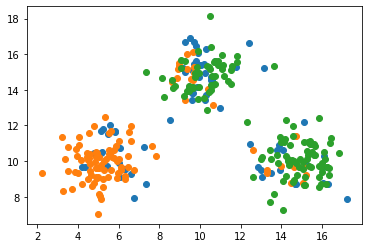

181   [3.34, 3.36, 3.38, 3.38, 3.38]
182   [3.34, 3.36, 3.38, 3.38, 3.38]
183   [3.34, 3.36, 3.38, 3.38, 3.38]
184   [3.28, 3.32, 3.33, 3.34, 3.36]
185   [3.28, 3.32, 3.33, 3.34, 3.36]
186   [3.2, 3.28, 3.32, 3.33, 3.34]
187   [3.2, 3.28, 3.32, 3.33, 3.34]
188   [3.2, 3.24, 3.25, 3.28, 3.32]
189   [3.2, 3.24, 3.25, 3.28, 3.32]
190   [3.2, 3.24, 3.25, 3.28, 3.29]
191   [3.19, 3.2, 3.24, 3.25, 3.25]
192   [3.19, 3.2, 3.24, 3.25, 3.25]
193   [3.13, 3.19, 3.19, 3.2, 3.24]
194   [3.13, 3.19, 3.19, 3.2, 3.24]
195   [3.13, 3.19, 3.19, 3.2, 3.24]
196   [3.13, 3.19, 3.19, 3.2, 3.24]
197   [3.13, 3.19, 3.19, 3.2, 3.24]
198   [3.13, 3.19, 3.19, 3.2, 3.24]
199   [3.13, 3.19, 3.19, 3.2, 3.24]
200   [3.13, 3.18, 3.19, 3.19, 3.2]


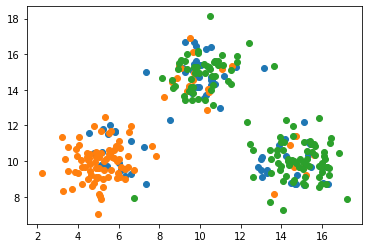

201   [3.13, 3.18, 3.19, 3.19, 3.2]
202   [3.13, 3.18, 3.19, 3.19, 3.2]
203   [3.13, 3.18, 3.19, 3.19, 3.2]
204   [3.13, 3.18, 3.19, 3.19, 3.2]
205   [3.13, 3.18, 3.19, 3.19, 3.2]
206   [3.13, 3.18, 3.19, 3.19, 3.2]
207   [3.13, 3.18, 3.19, 3.19, 3.2]
208   [3.13, 3.18, 3.18, 3.19, 3.19]
209   [3.13, 3.18, 3.18, 3.19, 3.19]
210   [3.13, 3.17, 3.18, 3.18, 3.19]
211   [3.13, 3.13, 3.15, 3.17, 3.18]
212   [3.11, 3.13, 3.13, 3.15, 3.17]
213   [3.0, 3.11, 3.13, 3.13, 3.15]
214   [3.0, 3.11, 3.13, 3.13, 3.13]
215   [3.0, 3.11, 3.13, 3.13, 3.13]
216   [3.0, 3.11, 3.13, 3.13, 3.13]
217   [3.0, 3.11, 3.13, 3.13, 3.13]
218   [3.0, 3.11, 3.13, 3.13, 3.13]
219   [3.0, 3.11, 3.13, 3.13, 3.13]
220   [3.0, 3.11, 3.13, 3.13, 3.13]


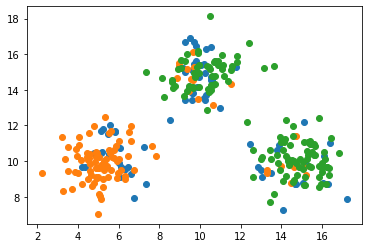

221   [3.0, 3.11, 3.13, 3.13, 3.13]
222   [3.0, 3.07, 3.11, 3.13, 3.13]
223   [3.0, 3.04, 3.07, 3.11, 3.13]
224   [3.0, 3.04, 3.07, 3.11, 3.13]
225   [3.0, 3.04, 3.07, 3.11, 3.13]
226   [3.0, 3.04, 3.07, 3.11, 3.11]
227   [3.0, 3.04, 3.07, 3.11, 3.11]
228   [3.0, 3.04, 3.07, 3.11, 3.11]
229   [3.0, 3.04, 3.05, 3.07, 3.1]
230   [3.0, 3.04, 3.05, 3.07, 3.1]
231   [3.0, 3.04, 3.05, 3.07, 3.1]
232   [3.0, 3.03, 3.04, 3.05, 3.07]
233   [3.0, 3.03, 3.03, 3.04, 3.05]
234   [3.0, 3.03, 3.03, 3.04, 3.05]
235   [3.0, 3.03, 3.03, 3.04, 3.05]
236   [3.0, 3.03, 3.03, 3.04, 3.05]
237   [3.0, 3.03, 3.03, 3.04, 3.05]
238   [3.0, 3.03, 3.03, 3.04, 3.04]
239   [3.0, 3.03, 3.03, 3.04, 3.04]
240   [3.0, 3.03, 3.03, 3.04, 3.04]


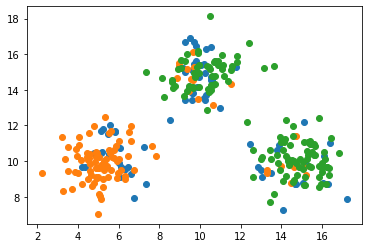

241   [2.98, 3.0, 3.03, 3.03, 3.04]
242   [2.98, 3.0, 3.03, 3.03, 3.04]
243   [2.98, 3.0, 3.03, 3.03, 3.04]
244   [2.98, 3.0, 3.03, 3.03, 3.04]
245   [2.98, 3.0, 3.03, 3.03, 3.04]
246   [2.98, 3.0, 3.03, 3.03, 3.04]
247   [2.95, 2.98, 3.0, 3.03, 3.03]
248   [2.95, 2.98, 3.0, 3.03, 3.03]
249   [2.95, 2.98, 3.0, 3.03, 3.03]
250   [2.95, 2.95, 2.98, 3.0, 3.03]
251   [2.95, 2.95, 2.97, 2.98, 3.0]
252   [2.95, 2.95, 2.97, 2.98, 3.0]
253   [2.95, 2.95, 2.97, 2.98, 3.0]
254   [2.95, 2.95, 2.97, 2.98, 3.0]
255   [2.95, 2.95, 2.97, 2.98, 3.0]
256   [2.92, 2.95, 2.95, 2.97, 2.98]
257   [2.92, 2.95, 2.95, 2.97, 2.98]
258   [2.92, 2.95, 2.95, 2.97, 2.97]
259   [2.92, 2.95, 2.95, 2.97, 2.97]
260   [2.92, 2.95, 2.95, 2.97, 2.97]


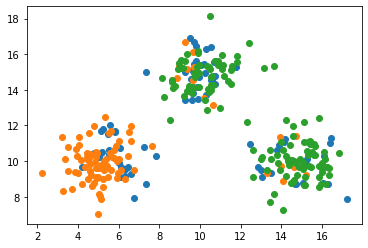

261   [2.92, 2.95, 2.95, 2.97, 2.97]
262   [2.89, 2.92, 2.95, 2.95, 2.97]
263   [2.89, 2.92, 2.95, 2.95, 2.97]
264   [2.89, 2.92, 2.95, 2.95, 2.97]
265   [2.89, 2.92, 2.95, 2.95, 2.97]
266   [2.89, 2.92, 2.95, 2.95, 2.97]
267   [2.89, 2.92, 2.95, 2.95, 2.97]
268   [2.89, 2.92, 2.92, 2.95, 2.95]
269   [2.89, 2.92, 2.92, 2.95, 2.95]
270   [2.86, 2.89, 2.92, 2.92, 2.95]
271   [2.85, 2.86, 2.88, 2.89, 2.92]
272   [2.85, 2.86, 2.88, 2.89, 2.92]
273   [2.85, 2.86, 2.88, 2.89, 2.92]
274   [2.85, 2.86, 2.88, 2.89, 2.92]
275   [2.85, 2.86, 2.88, 2.89, 2.92]
276   [2.85, 2.86, 2.88, 2.89, 2.92]
277   [2.85, 2.86, 2.88, 2.88, 2.89]
278   [2.83, 2.85, 2.86, 2.88, 2.88]
279   [2.83, 2.85, 2.86, 2.88, 2.88]
280   [2.83, 2.85, 2.86, 2.88, 2.88]


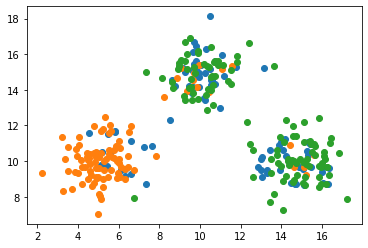

281   [2.83, 2.85, 2.86, 2.88, 2.88]
282   [2.79, 2.83, 2.85, 2.86, 2.88]
283   [2.79, 2.83, 2.85, 2.86, 2.88]
284   [2.79, 2.83, 2.85, 2.86, 2.88]
285   [2.79, 2.79, 2.83, 2.85, 2.86]
286   [2.79, 2.79, 2.8, 2.83, 2.85]
287   [2.75, 2.79, 2.79, 2.8, 2.83]
288   [2.75, 2.79, 2.79, 2.8, 2.83]
289   [2.75, 2.79, 2.79, 2.8, 2.83]
290   [2.75, 2.79, 2.79, 2.79, 2.8]
291   [2.75, 2.79, 2.79, 2.79, 2.8]
292   [2.72, 2.75, 2.79, 2.79, 2.79]
293   [2.72, 2.75, 2.79, 2.79, 2.79]
294   [2.72, 2.74, 2.75, 2.79, 2.79]
295   [2.72, 2.74, 2.75, 2.79, 2.79]
296   [2.72, 2.74, 2.75, 2.79, 2.79]
297   [2.72, 2.74, 2.75, 2.79, 2.79]
298   [2.72, 2.74, 2.75, 2.79, 2.79]
299   [2.72, 2.74, 2.75, 2.77, 2.79]


In [155]:
npopul = 100         #  Размер популяции
nsurv = 20           #  Число выживших ботов
nnew = npopul-nsurv  #  Новых ботов
l = 300              #  Генов у бота
mut = 0.05           #  Коэффициент мутации
epohs = 300          #  Эпохи


popul = []
val = []

for i in range(npopul):
  popul.append(createBot())
  
for it in range(epohs):
  
  val = [ErrorBot(bot) for bot in popul]
  
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)

  print(it, " ", [round(i,2) for i in sval[0:5]])
  if (it % 20 == 0):     # Каждую 20-ую эпоху 
    for i in range(count_class):
      plotPoints = points[newpopul[0]==i,:]
      plt.scatter(plotPoints[:,0], plotPoints[:,1])
    plt.show()

  for i in range(nnew):
    
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []
    
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0,2)
      
      newbot.append(x)
      
    newbot = np.array(newbot)
    newpopul.append(newbot)
    
  popul = newpopul

## 50 точек каждого класса

In [156]:
# Создадим точки на двухмерной плоскости

count_class = 3                                     # Число классов
n = 50                                     # Количество точек каждого класса
cnt = [[5, 5], [10,10], [15,5]]             # Зададим центры каждого класса

points = []                                    # Будущий массив с точками
for i in range(count_class):                        #  Три класса
  for j in range(n):                        # По n точек в каждом классе
    x = cnt[i][0] + np.random.normal(0, 1)  # Координата x данной точки
    y = cnt[i][1] + np.random.normal(0, 1)  # Координата y данной точки
    points.append([x,y])

In [157]:
points = np.array(points)  # Первод в numpy
print(points.shape)     # Узнаем размер массива

(150, 2)


### Отображение на графике полученных точек

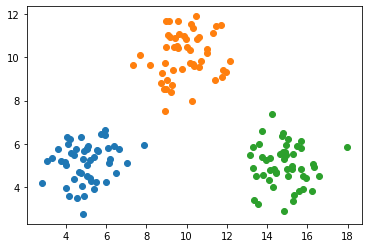

In [158]:
plt.scatter(points[:n,0], points[:n,1])
plt.scatter(points[n:n*2,0], points[n:n*2,1])
plt.scatter(points[n*2:,0], points[n*2:,1])
plt.show()

In [159]:
bot = createBot()       # Создаем бота

0   [21.63, 22.43, 23.53, 24.94, 26.36]


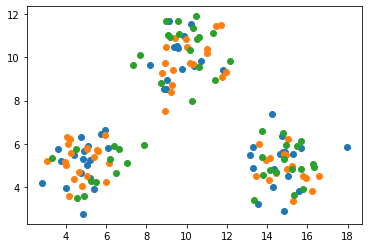

1   [21.63, 21.63, 21.76, 22.23, 22.43]
2   [19.36, 19.38, 19.76, 20.43, 20.65]
3   [17.59, 17.97, 18.07, 18.59, 18.72]
4   [16.21, 17.02, 17.09, 17.45, 17.59]
5   [14.93, 15.34, 15.48, 16.21, 16.39]
6   [13.89, 14.26, 14.91, 14.93, 15.15]
7   [13.68, 13.7, 13.76, 13.88, 13.89]
8   [12.67, 13.1, 13.13, 13.2, 13.37]
9   [12.57, 12.64, 12.64, 12.67, 12.98]
10   [12.38, 12.41, 12.45, 12.45, 12.49]
11   [11.17, 12.08, 12.16, 12.25, 12.28]
12   [10.88, 10.94, 11.17, 11.48, 11.52]
13   [10.88, 10.88, 10.91, 10.94, 11.08]
14   [10.21, 10.48, 10.57, 10.61, 10.63]
15   [9.8, 10.17, 10.21, 10.28, 10.43]
16   [9.63, 9.75, 9.78, 9.78, 9.8]
17   [9.57, 9.59, 9.63, 9.63, 9.66]
18   [8.99, 9.1, 9.37, 9.48, 9.51]
19   [8.85, 8.89, 8.99, 9.08, 9.1]
20   [8.6, 8.75, 8.81, 8.83, 8.85]


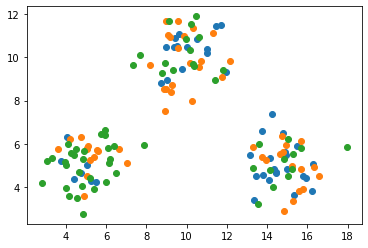

21   [8.03, 8.5, 8.56, 8.6, 8.6]
22   [8.03, 8.27, 8.39, 8.48, 8.5]
23   [8.03, 8.27, 8.27, 8.28, 8.33]
24   [7.87, 8.03, 8.13, 8.17, 8.2]
25   [7.58, 7.66, 7.76, 7.84, 7.87]
26   [7.45, 7.58, 7.65, 7.66, 7.67]
27   [7.12, 7.4, 7.43, 7.45, 7.46]
28   [7.1, 7.12, 7.12, 7.23, 7.26]
29   [6.98, 7.1, 7.12, 7.12, 7.14]
30   [6.33, 6.45, 6.93, 6.97, 6.98]
31   [6.33, 6.45, 6.45, 6.47, 6.65]
32   [6.15, 6.27, 6.28, 6.33, 6.45]
33   [6.11, 6.14, 6.15, 6.15, 6.19]
34   [5.92, 5.98, 6.05, 6.1, 6.1]
35   [5.71, 5.88, 5.92, 5.94, 5.98]
36   [5.69, 5.71, 5.77, 5.87, 5.88]
37   [5.69, 5.71, 5.77, 5.77, 5.79]
38   [5.57, 5.69, 5.71, 5.71, 5.73]
39   [5.39, 5.46, 5.51, 5.57, 5.57]
40   [5.32, 5.34, 5.38, 5.39, 5.45]


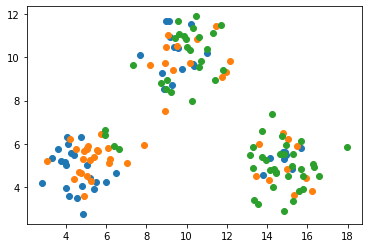

41   [4.86, 5.01, 5.24, 5.32, 5.34]
42   [4.86, 5.01, 5.11, 5.11, 5.15]
43   [4.65, 4.69, 4.86, 5.01, 5.11]
44   [4.65, 4.68, 4.69, 4.86, 4.86]
45   [4.52, 4.65, 4.68, 4.69, 4.7]
46   [4.49, 4.52, 4.65, 4.68, 4.69]
47   [4.31, 4.34, 4.49, 4.52, 4.53]
48   [4.31, 4.34, 4.34, 4.46, 4.49]
49   [4.14, 4.31, 4.34, 4.34, 4.46]
50   [4.14, 4.24, 4.28, 4.31, 4.32]
51   [4.14, 4.15, 4.16, 4.24, 4.24]
52   [3.82, 3.93, 4.11, 4.14, 4.14]
53   [3.82, 3.93, 3.99, 4.1, 4.11]
54   [3.82, 3.93, 3.99, 4.1, 4.11]
55   [3.82, 3.84, 3.93, 3.94, 3.97]
56   [3.72, 3.8, 3.82, 3.84, 3.88]
57   [3.72, 3.76, 3.8, 3.82, 3.84]
58   [3.36, 3.72, 3.73, 3.74, 3.75]
59   [3.36, 3.59, 3.72, 3.73, 3.73]
60   [3.36, 3.59, 3.6, 3.72, 3.73]


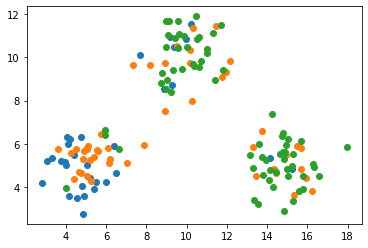

61   [3.23, 3.36, 3.37, 3.59, 3.6]
62   [3.23, 3.31, 3.34, 3.36, 3.37]
63   [3.23, 3.23, 3.31, 3.34, 3.36]
64   [3.15, 3.23, 3.23, 3.23, 3.31]
65   [3.15, 3.19, 3.23, 3.23, 3.23]
66   [3.15, 3.19, 3.23, 3.23, 3.23]
67   [3.06, 3.15, 3.16, 3.19, 3.23]
68   [3.0, 3.06, 3.1, 3.15, 3.16]
69   [3.0, 3.06, 3.09, 3.1, 3.11]
70   [2.96, 3.0, 3.01, 3.06, 3.09]
71   [2.91, 2.96, 2.98, 3.0, 3.01]
72   [2.91, 2.96, 2.96, 2.96, 2.98]
73   [2.91, 2.94, 2.96, 2.96, 2.96]
74   [2.91, 2.92, 2.94, 2.95, 2.96]
75   [2.91, 2.91, 2.92, 2.94, 2.95]
76   [2.83, 2.91, 2.91, 2.92, 2.94]
77   [2.83, 2.84, 2.91, 2.91, 2.92]
78   [2.81, 2.83, 2.84, 2.9, 2.91]
79   [2.81, 2.83, 2.83, 2.84, 2.87]
80   [2.81, 2.83, 2.83, 2.84, 2.87]


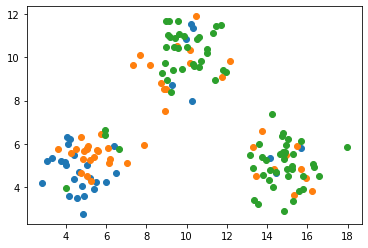

81   [2.69, 2.74, 2.81, 2.82, 2.82]
82   [2.69, 2.69, 2.74, 2.74, 2.81]
83   [2.69, 2.69, 2.74, 2.74, 2.74]
84   [2.68, 2.69, 2.69, 2.74, 2.74]
85   [2.65, 2.68, 2.69, 2.69, 2.74]
86   [2.65, 2.68, 2.69, 2.69, 2.69]
87   [2.65, 2.68, 2.69, 2.69, 2.69]
88   [2.65, 2.68, 2.69, 2.69, 2.69]
89   [2.65, 2.68, 2.68, 2.69, 2.69]
90   [2.58, 2.65, 2.66, 2.68, 2.68]
91   [2.58, 2.6, 2.63, 2.64, 2.64]
92   [2.57, 2.58, 2.59, 2.6, 2.6]
93   [2.57, 2.58, 2.59, 2.6, 2.6]
94   [2.57, 2.58, 2.59, 2.59, 2.6]
95   [2.57, 2.58, 2.59, 2.59, 2.6]
96   [2.45, 2.56, 2.57, 2.57, 2.58]
97   [2.45, 2.48, 2.56, 2.57, 2.57]
98   [2.45, 2.48, 2.48, 2.54, 2.55]
99   [2.4, 2.45, 2.48, 2.48, 2.54]
100   [2.4, 2.43, 2.45, 2.48, 2.48]


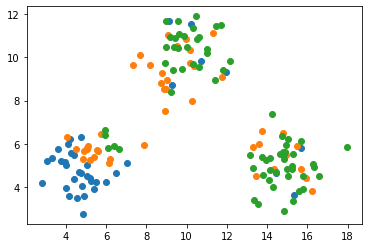

101   [2.34, 2.38, 2.4, 2.43, 2.45]
102   [2.34, 2.38, 2.4, 2.42, 2.43]
103   [2.34, 2.38, 2.4, 2.42, 2.42]
104   [2.17, 2.34, 2.38, 2.4, 2.42]
105   [2.16, 2.17, 2.34, 2.38, 2.39]
106   [2.16, 2.17, 2.2, 2.34, 2.34]
107   [2.16, 2.17, 2.2, 2.21, 2.27]
108   [2.16, 2.17, 2.19, 2.2, 2.21]
109   [2.16, 2.17, 2.19, 2.19, 2.2]
110   [2.11, 2.16, 2.16, 2.17, 2.19]
111   [2.08, 2.11, 2.16, 2.16, 2.17]
112   [1.79, 2.08, 2.11, 2.16, 2.16]
113   [1.79, 1.79, 1.91, 1.98, 2.08]
114   [1.79, 1.79, 1.9, 1.91, 1.94]
115   [1.79, 1.79, 1.88, 1.9, 1.91]
116   [1.79, 1.79, 1.85, 1.88, 1.9]
117   [1.79, 1.79, 1.82, 1.85, 1.88]
118   [1.79, 1.79, 1.81, 1.82, 1.85]
119   [1.74, 1.79, 1.79, 1.81, 1.81]
120   [1.74, 1.74, 1.79, 1.79, 1.81]


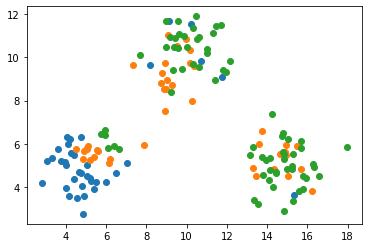

121   [1.74, 1.74, 1.79, 1.79, 1.81]
122   [1.74, 1.74, 1.79, 1.79, 1.79]
123   [1.65, 1.7, 1.74, 1.74, 1.78]
124   [1.65, 1.7, 1.74, 1.74, 1.78]
125   [1.65, 1.7, 1.71, 1.74, 1.74]
126   [1.65, 1.7, 1.71, 1.74, 1.74]
127   [1.64, 1.65, 1.7, 1.71, 1.74]
128   [1.56, 1.64, 1.65, 1.66, 1.68]
129   [1.56, 1.59, 1.63, 1.64, 1.65]
130   [1.56, 1.58, 1.59, 1.59, 1.6]
131   [1.56, 1.58, 1.59, 1.59, 1.6]
132   [1.51, 1.56, 1.58, 1.59, 1.59]
133   [1.51, 1.51, 1.56, 1.57, 1.58]
134   [1.51, 1.51, 1.56, 1.57, 1.58]
135   [1.44, 1.51, 1.51, 1.56, 1.57]
136   [1.44, 1.51, 1.51, 1.54, 1.56]
137   [1.44, 1.51, 1.51, 1.54, 1.56]
138   [1.44, 1.51, 1.51, 1.51, 1.54]
139   [1.44, 1.51, 1.51, 1.51, 1.53]
140   [1.44, 1.44, 1.51, 1.51, 1.51]


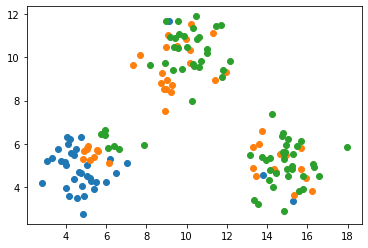

141   [1.44, 1.44, 1.51, 1.51, 1.51]
142   [1.44, 1.44, 1.51, 1.51, 1.51]
143   [1.44, 1.44, 1.48, 1.51, 1.51]
144   [1.44, 1.44, 1.48, 1.5, 1.5]
145   [1.44, 1.44, 1.48, 1.5, 1.5]
146   [1.44, 1.44, 1.44, 1.48, 1.5]
147   [1.44, 1.44, 1.44, 1.46, 1.48]
148   [1.44, 1.44, 1.44, 1.46, 1.48]
149   [1.44, 1.44, 1.44, 1.46, 1.48]
150   [1.44, 1.44, 1.44, 1.46, 1.48]
151   [1.44, 1.44, 1.44, 1.46, 1.47]
152   [1.44, 1.44, 1.44, 1.46, 1.47]
153   [1.44, 1.44, 1.44, 1.46, 1.47]
154   [1.44, 1.44, 1.44, 1.46, 1.47]
155   [1.42, 1.44, 1.44, 1.44, 1.44]
156   [1.42, 1.44, 1.44, 1.44, 1.44]
157   [1.42, 1.44, 1.44, 1.44, 1.44]
158   [1.42, 1.44, 1.44, 1.44, 1.44]
159   [1.42, 1.44, 1.44, 1.44, 1.44]
160   [1.42, 1.43, 1.44, 1.44, 1.44]


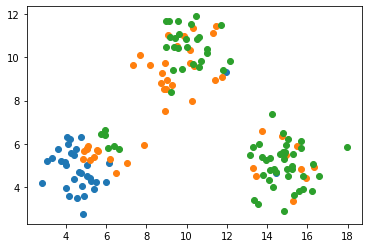

161   [1.42, 1.43, 1.43, 1.43, 1.44]
162   [1.42, 1.43, 1.43, 1.43, 1.44]
163   [1.4, 1.41, 1.42, 1.43, 1.43]
164   [1.4, 1.41, 1.41, 1.42, 1.43]
165   [1.4, 1.41, 1.41, 1.42, 1.43]
166   [1.4, 1.41, 1.41, 1.42, 1.43]
167   [1.39, 1.4, 1.41, 1.41, 1.42]
168   [1.39, 1.4, 1.41, 1.41, 1.42]
169   [1.39, 1.4, 1.41, 1.41, 1.42]
170   [1.39, 1.4, 1.41, 1.41, 1.42]
171   [1.39, 1.4, 1.41, 1.41, 1.41]
172   [1.39, 1.4, 1.41, 1.41, 1.41]
173   [1.36, 1.39, 1.4, 1.41, 1.41]
174   [1.36, 1.39, 1.4, 1.4, 1.41]
175   [1.36, 1.38, 1.38, 1.39, 1.4]
176   [1.36, 1.38, 1.38, 1.39, 1.4]
177   [1.36, 1.38, 1.38, 1.39, 1.39]
178   [1.36, 1.38, 1.38, 1.39, 1.39]
179   [1.36, 1.38, 1.38, 1.39, 1.39]
180   [1.26, 1.36, 1.38, 1.38, 1.39]


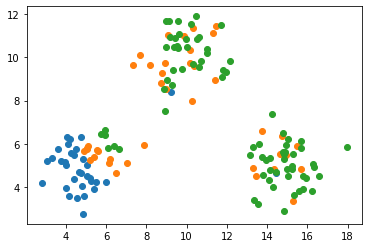

181   [1.26, 1.29, 1.36, 1.38, 1.38]
182   [1.26, 1.29, 1.29, 1.36, 1.36]
183   [1.26, 1.29, 1.29, 1.36, 1.36]
184   [1.26, 1.29, 1.29, 1.36, 1.36]
185   [1.26, 1.29, 1.29, 1.36, 1.36]
186   [1.26, 1.29, 1.29, 1.31, 1.36]
187   [1.26, 1.29, 1.29, 1.31, 1.31]
188   [1.26, 1.29, 1.29, 1.31, 1.31]
189   [1.26, 1.29, 1.29, 1.31, 1.31]
190   [1.26, 1.29, 1.29, 1.31, 1.31]
191   [1.26, 1.29, 1.29, 1.31, 1.31]
192   [1.26, 1.26, 1.29, 1.29, 1.3]
193   [1.26, 1.26, 1.29, 1.29, 1.3]
194   [1.26, 1.26, 1.27, 1.29, 1.29]
195   [1.26, 1.26, 1.27, 1.29, 1.29]
196   [1.26, 1.26, 1.26, 1.27, 1.27]
197   [1.24, 1.26, 1.26, 1.26, 1.27]
198   [1.24, 1.26, 1.26, 1.26, 1.27]
199   [1.24, 1.26, 1.26, 1.26, 1.26]
200   [1.24, 1.25, 1.26, 1.26, 1.26]


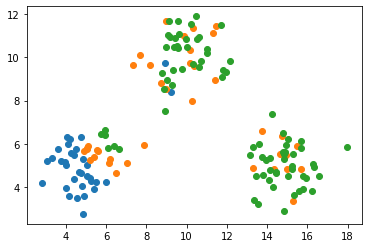

201   [1.24, 1.25, 1.25, 1.26, 1.26]
202   [1.24, 1.25, 1.25, 1.26, 1.26]
203   [1.24, 1.25, 1.25, 1.26, 1.26]
204   [1.24, 1.25, 1.25, 1.26, 1.26]
205   [1.24, 1.25, 1.25, 1.26, 1.26]
206   [1.24, 1.25, 1.25, 1.26, 1.26]
207   [1.24, 1.25, 1.25, 1.26, 1.26]
208   [1.24, 1.25, 1.25, 1.26, 1.26]
209   [1.24, 1.25, 1.25, 1.26, 1.26]
210   [1.24, 1.25, 1.25, 1.26, 1.26]
211   [1.21, 1.24, 1.25, 1.25, 1.26]
212   [1.21, 1.24, 1.25, 1.25, 1.25]
213   [1.21, 1.24, 1.25, 1.25, 1.25]
214   [1.21, 1.24, 1.24, 1.25, 1.25]
215   [1.21, 1.23, 1.24, 1.24, 1.25]
216   [1.21, 1.22, 1.22, 1.23, 1.24]
217   [1.21, 1.22, 1.22, 1.23, 1.23]
218   [1.19, 1.21, 1.22, 1.22, 1.23]
219   [1.19, 1.21, 1.21, 1.22, 1.22]
220   [1.19, 1.21, 1.21, 1.22, 1.22]


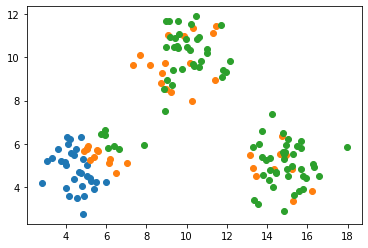

221   [1.19, 1.21, 1.21, 1.22, 1.22]
222   [1.19, 1.21, 1.21, 1.22, 1.22]
223   [1.19, 1.2, 1.21, 1.21, 1.21]
224   [1.19, 1.19, 1.2, 1.21, 1.21]
225   [1.19, 1.19, 1.2, 1.2, 1.21]
226   [1.19, 1.19, 1.2, 1.2, 1.21]
227   [1.19, 1.19, 1.2, 1.2, 1.21]
228   [1.19, 1.19, 1.2, 1.2, 1.21]
229   [1.19, 1.19, 1.2, 1.2, 1.21]
230   [1.19, 1.19, 1.2, 1.2, 1.2]
231   [1.18, 1.19, 1.19, 1.19, 1.2]
232   [1.18, 1.19, 1.19, 1.19, 1.2]
233   [1.18, 1.19, 1.19, 1.19, 1.2]
234   [1.18, 1.19, 1.19, 1.19, 1.2]
235   [1.15, 1.18, 1.19, 1.19, 1.19]
236   [1.15, 1.17, 1.18, 1.18, 1.19]
237   [1.15, 1.17, 1.18, 1.18, 1.19]
238   [1.15, 1.17, 1.18, 1.18, 1.19]
239   [1.15, 1.17, 1.18, 1.18, 1.18]
240   [1.15, 1.17, 1.17, 1.18, 1.18]


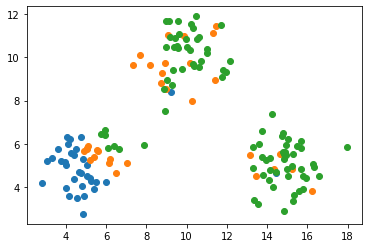

241   [1.15, 1.17, 1.17, 1.18, 1.18]
242   [1.15, 1.17, 1.17, 1.18, 1.18]
243   [1.15, 1.17, 1.17, 1.18, 1.18]
244   [1.15, 1.17, 1.17, 1.18, 1.18]
245   [1.15, 1.17, 1.17, 1.18, 1.18]
246   [1.15, 1.17, 1.17, 1.18, 1.18]
247   [1.15, 1.16, 1.17, 1.17, 1.18]
248   [1.15, 1.16, 1.17, 1.17, 1.18]
249   [1.15, 1.16, 1.17, 1.17, 1.17]
250   [1.15, 1.16, 1.17, 1.17, 1.17]
251   [1.15, 1.16, 1.17, 1.17, 1.17]
252   [1.15, 1.16, 1.16, 1.17, 1.17]
253   [1.15, 1.16, 1.16, 1.17, 1.17]
254   [1.15, 1.16, 1.16, 1.17, 1.17]
255   [1.15, 1.16, 1.16, 1.17, 1.17]
256   [1.15, 1.16, 1.16, 1.17, 1.17]
257   [1.12, 1.15, 1.16, 1.16, 1.17]
258   [1.11, 1.12, 1.15, 1.15, 1.16]
259   [1.11, 1.12, 1.15, 1.15, 1.16]
260   [1.11, 1.12, 1.13, 1.14, 1.15]


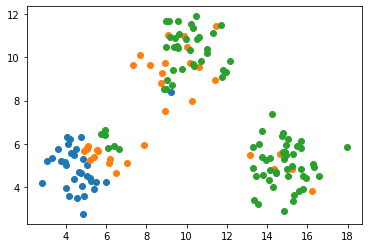

261   [1.11, 1.12, 1.13, 1.14, 1.15]
262   [1.11, 1.12, 1.13, 1.13, 1.14]
263   [1.11, 1.12, 1.13, 1.13, 1.14]
264   [1.11, 1.12, 1.13, 1.13, 1.14]
265   [1.11, 1.12, 1.13, 1.13, 1.14]
266   [1.11, 1.12, 1.13, 1.13, 1.14]
267   [1.11, 1.12, 1.13, 1.13, 1.14]
268   [1.11, 1.12, 1.13, 1.13, 1.14]
269   [1.11, 1.12, 1.13, 1.13, 1.14]
270   [1.11, 1.12, 1.13, 1.13, 1.14]
271   [1.11, 1.12, 1.13, 1.13, 1.13]
272   [1.11, 1.12, 1.13, 1.13, 1.13]
273   [1.11, 1.12, 1.13, 1.13, 1.13]
274   [1.11, 1.12, 1.13, 1.13, 1.13]
275   [1.11, 1.12, 1.13, 1.13, 1.13]
276   [1.11, 1.12, 1.13, 1.13, 1.13]
277   [1.11, 1.12, 1.13, 1.13, 1.13]
278   [1.11, 1.12, 1.13, 1.13, 1.13]
279   [1.11, 1.12, 1.13, 1.13, 1.13]
280   [1.11, 1.11, 1.12, 1.13, 1.13]


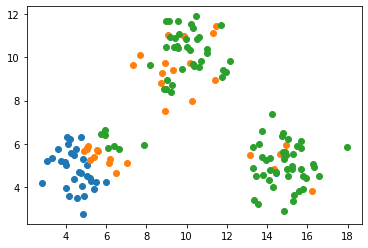

281   [1.11, 1.11, 1.12, 1.13, 1.13]
282   [1.11, 1.11, 1.12, 1.13, 1.13]
283   [1.11, 1.11, 1.12, 1.13, 1.13]
284   [1.11, 1.11, 1.12, 1.13, 1.13]
285   [1.08, 1.11, 1.11, 1.12, 1.13]
286   [1.08, 1.11, 1.11, 1.12, 1.13]
287   [1.08, 1.11, 1.11, 1.12, 1.13]
288   [1.08, 1.11, 1.11, 1.12, 1.13]
289   [1.08, 1.11, 1.11, 1.11, 1.12]
290   [1.08, 1.08, 1.11, 1.11, 1.11]
291   [1.08, 1.08, 1.1, 1.11, 1.11]
292   [1.08, 1.08, 1.1, 1.11, 1.11]
293   [1.08, 1.08, 1.1, 1.11, 1.11]
294   [1.08, 1.08, 1.1, 1.11, 1.11]
295   [1.08, 1.08, 1.1, 1.11, 1.11]
296   [1.08, 1.08, 1.09, 1.1, 1.1]
297   [1.08, 1.08, 1.09, 1.1, 1.1]
298   [1.08, 1.08, 1.09, 1.1, 1.1]
299   [1.08, 1.08, 1.09, 1.1, 1.1]
300   [1.08, 1.08, 1.09, 1.1, 1.1]


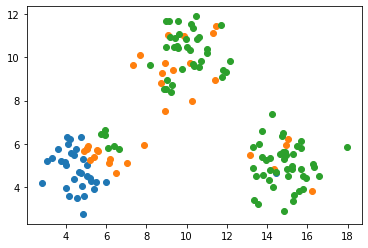

301   [1.08, 1.08, 1.08, 1.09, 1.1]
302   [1.08, 1.08, 1.08, 1.09, 1.09]
303   [1.05, 1.08, 1.08, 1.08, 1.09]
304   [1.05, 1.07, 1.08, 1.08, 1.08]
305   [1.05, 1.07, 1.08, 1.08, 1.08]
306   [1.05, 1.07, 1.08, 1.08, 1.08]
307   [1.05, 1.05, 1.07, 1.08, 1.08]
308   [1.05, 1.05, 1.07, 1.07, 1.08]
309   [1.05, 1.05, 1.07, 1.07, 1.08]
310   [1.05, 1.05, 1.07, 1.07, 1.08]
311   [1.05, 1.05, 1.07, 1.07, 1.08]
312   [1.05, 1.05, 1.07, 1.07, 1.08]
313   [1.05, 1.05, 1.05, 1.07, 1.07]
314   [1.05, 1.05, 1.05, 1.07, 1.07]
315   [1.05, 1.05, 1.05, 1.05, 1.07]
316   [1.05, 1.05, 1.05, 1.05, 1.07]
317   [1.05, 1.05, 1.05, 1.05, 1.07]
318   [1.05, 1.05, 1.05, 1.05, 1.07]
319   [1.05, 1.05, 1.05, 1.05, 1.05]
320   [1.05, 1.05, 1.05, 1.05, 1.05]


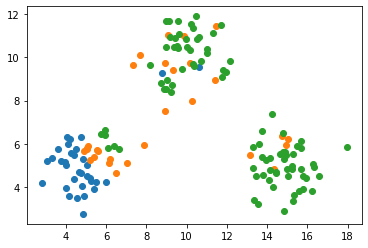

321   [1.02, 1.05, 1.05, 1.05, 1.05]
322   [1.02, 1.04, 1.04, 1.04, 1.05]
323   [1.02, 1.04, 1.04, 1.04, 1.04]
324   [1.02, 1.04, 1.04, 1.04, 1.04]
325   [1.02, 1.03, 1.04, 1.04, 1.04]
326   [1.02, 1.03, 1.04, 1.04, 1.04]
327   [1.02, 1.03, 1.04, 1.04, 1.04]
328   [1.01, 1.02, 1.03, 1.04, 1.04]
329   [1.01, 1.02, 1.03, 1.04, 1.04]
330   [1.01, 1.02, 1.03, 1.04, 1.04]
331   [1.01, 1.02, 1.03, 1.04, 1.04]
332   [1.01, 1.02, 1.03, 1.04, 1.04]
333   [1.01, 1.02, 1.03, 1.03, 1.04]
334   [1.01, 1.02, 1.03, 1.03, 1.04]
335   [1.01, 1.02, 1.03, 1.03, 1.04]
336   [1.01, 1.02, 1.03, 1.03, 1.03]
337   [1.01, 1.02, 1.03, 1.03, 1.03]
338   [1.01, 1.02, 1.03, 1.03, 1.03]
339   [1.01, 1.02, 1.03, 1.03, 1.03]
340   [1.01, 1.02, 1.03, 1.03, 1.03]


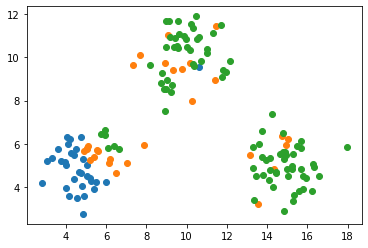

341   [1.01, 1.02, 1.03, 1.03, 1.03]
342   [1.01, 1.02, 1.03, 1.03, 1.03]
343   [1.01, 1.02, 1.03, 1.03, 1.03]
344   [1.01, 1.02, 1.03, 1.03, 1.03]
345   [1.01, 1.02, 1.03, 1.03, 1.03]
346   [1.01, 1.02, 1.03, 1.03, 1.03]
347   [1.01, 1.02, 1.03, 1.03, 1.03]
348   [1.01, 1.02, 1.03, 1.03, 1.03]
349   [1.01, 1.02, 1.03, 1.03, 1.03]
350   [1.01, 1.02, 1.03, 1.03, 1.03]
351   [1.01, 1.02, 1.03, 1.03, 1.03]
352   [1.01, 1.01, 1.02, 1.03, 1.03]
353   [1.01, 1.01, 1.02, 1.03, 1.03]
354   [1.01, 1.01, 1.02, 1.03, 1.03]
355   [1.01, 1.01, 1.01, 1.02, 1.03]
356   [1.01, 1.01, 1.01, 1.02, 1.03]
357   [1.01, 1.01, 1.01, 1.02, 1.03]
358   [1.0, 1.01, 1.01, 1.01, 1.02]
359   [1.0, 1.01, 1.01, 1.01, 1.02]
360   [1.0, 1.01, 1.01, 1.01, 1.02]


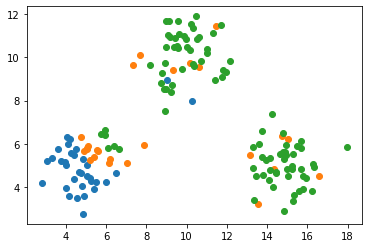

361   [1.0, 1.01, 1.01, 1.01, 1.02]
362   [1.0, 1.01, 1.01, 1.01, 1.02]
363   [1.0, 1.01, 1.01, 1.01, 1.02]
364   [1.0, 1.01, 1.01, 1.01, 1.02]
365   [1.0, 1.01, 1.01, 1.01, 1.02]
366   [1.0, 1.01, 1.01, 1.01, 1.02]
367   [1.0, 1.01, 1.01, 1.01, 1.02]
368   [1.0, 1.01, 1.01, 1.01, 1.02]
369   [1.0, 1.01, 1.01, 1.01, 1.01]
370   [0.95, 1.0, 1.01, 1.01, 1.01]
371   [0.93, 0.95, 1.0, 1.0, 1.01]
372   [0.93, 0.95, 0.99, 1.0, 1.0]
373   [0.93, 0.95, 0.99, 0.99, 1.0]
374   [0.93, 0.95, 0.99, 0.99, 1.0]
375   [0.93, 0.95, 0.99, 0.99, 1.0]
376   [0.93, 0.94, 0.95, 0.99, 0.99]
377   [0.93, 0.94, 0.95, 0.99, 0.99]
378   [0.93, 0.94, 0.95, 0.99, 0.99]
379   [0.93, 0.94, 0.95, 0.99, 0.99]
380   [0.93, 0.94, 0.95, 0.99, 0.99]


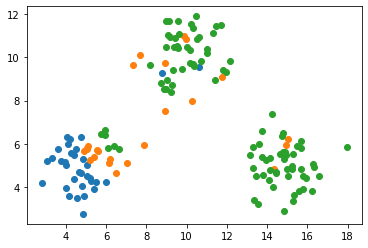

381   [0.93, 0.94, 0.95, 0.99, 0.99]
382   [0.93, 0.94, 0.95, 0.97, 0.99]
383   [0.93, 0.94, 0.95, 0.97, 0.98]
384   [0.93, 0.94, 0.95, 0.97, 0.98]
385   [0.93, 0.94, 0.94, 0.95, 0.97]
386   [0.93, 0.93, 0.94, 0.94, 0.95]
387   [0.93, 0.93, 0.94, 0.94, 0.95]
388   [0.93, 0.93, 0.94, 0.94, 0.95]
389   [0.93, 0.93, 0.94, 0.94, 0.95]
390   [0.93, 0.93, 0.94, 0.94, 0.94]
391   [0.93, 0.93, 0.94, 0.94, 0.94]
392   [0.93, 0.93, 0.94, 0.94, 0.94]
393   [0.93, 0.93, 0.94, 0.94, 0.94]
394   [0.93, 0.93, 0.94, 0.94, 0.94]
395   [0.93, 0.93, 0.93, 0.94, 0.94]
396   [0.93, 0.93, 0.93, 0.94, 0.94]
397   [0.93, 0.93, 0.93, 0.94, 0.94]
398   [0.93, 0.93, 0.93, 0.94, 0.94]
399   [0.93, 0.93, 0.93, 0.94, 0.94]
400   [0.93, 0.93, 0.93, 0.94, 0.94]


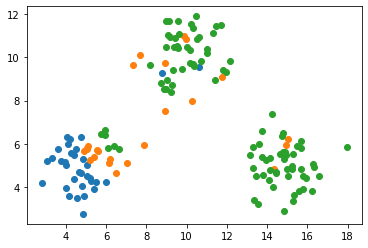

401   [0.93, 0.93, 0.93, 0.94, 0.94]
402   [0.93, 0.93, 0.93, 0.94, 0.94]
403   [0.93, 0.93, 0.93, 0.94, 0.94]
404   [0.93, 0.93, 0.93, 0.94, 0.94]
405   [0.93, 0.93, 0.93, 0.94, 0.94]
406   [0.93, 0.93, 0.93, 0.94, 0.94]
407   [0.93, 0.93, 0.93, 0.93, 0.94]
408   [0.93, 0.93, 0.93, 0.93, 0.93]
409   [0.92, 0.93, 0.93, 0.93, 0.93]
410   [0.92, 0.92, 0.93, 0.93, 0.93]
411   [0.92, 0.92, 0.93, 0.93, 0.93]
412   [0.92, 0.92, 0.93, 0.93, 0.93]
413   [0.92, 0.92, 0.93, 0.93, 0.93]
414   [0.92, 0.92, 0.93, 0.93, 0.93]
415   [0.92, 0.92, 0.93, 0.93, 0.93]
416   [0.92, 0.92, 0.93, 0.93, 0.93]
417   [0.92, 0.92, 0.92, 0.93, 0.93]
418   [0.92, 0.92, 0.92, 0.93, 0.93]
419   [0.92, 0.92, 0.92, 0.93, 0.93]
420   [0.92, 0.92, 0.92, 0.93, 0.93]


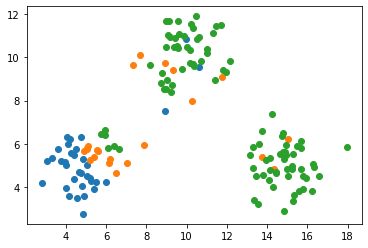

421   [0.89, 0.92, 0.92, 0.92, 0.93]
422   [0.89, 0.89, 0.92, 0.92, 0.92]
423   [0.89, 0.89, 0.91, 0.92, 0.92]
424   [0.89, 0.89, 0.91, 0.92, 0.92]
425   [0.87, 0.89, 0.89, 0.91, 0.92]
426   [0.87, 0.89, 0.89, 0.91, 0.92]
427   [0.87, 0.89, 0.89, 0.91, 0.92]
428   [0.87, 0.89, 0.89, 0.89, 0.91]
429   [0.87, 0.87, 0.89, 0.89, 0.89]
430   [0.87, 0.87, 0.89, 0.89, 0.89]
431   [0.87, 0.87, 0.89, 0.89, 0.89]
432   [0.87, 0.87, 0.89, 0.89, 0.89]
433   [0.83, 0.87, 0.87, 0.89, 0.89]
434   [0.83, 0.87, 0.87, 0.88, 0.89]
435   [0.83, 0.87, 0.87, 0.88, 0.89]
436   [0.83, 0.87, 0.87, 0.88, 0.88]
437   [0.83, 0.87, 0.87, 0.88, 0.88]
438   [0.83, 0.87, 0.87, 0.87, 0.87]
439   [0.83, 0.87, 0.87, 0.87, 0.87]
440   [0.83, 0.86, 0.87, 0.87, 0.87]


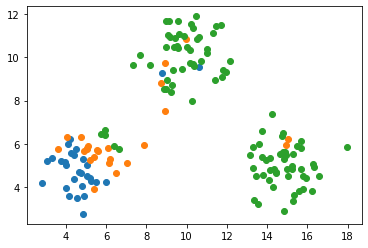

441   [0.83, 0.86, 0.87, 0.87, 0.87]
442   [0.83, 0.86, 0.87, 0.87, 0.87]
443   [0.83, 0.86, 0.86, 0.87, 0.87]
444   [0.83, 0.86, 0.86, 0.87, 0.87]
445   [0.83, 0.86, 0.86, 0.87, 0.87]
446   [0.83, 0.86, 0.86, 0.87, 0.87]
447   [0.82, 0.83, 0.86, 0.86, 0.87]
448   [0.82, 0.83, 0.86, 0.86, 0.86]
449   [0.82, 0.83, 0.86, 0.86, 0.86]
450   [0.82, 0.83, 0.86, 0.86, 0.86]
451   [0.82, 0.83, 0.86, 0.86, 0.86]
452   [0.82, 0.83, 0.86, 0.86, 0.86]
453   [0.82, 0.83, 0.86, 0.86, 0.86]
454   [0.82, 0.83, 0.86, 0.86, 0.86]
455   [0.82, 0.83, 0.86, 0.86, 0.86]
456   [0.82, 0.83, 0.84, 0.86, 0.86]
457   [0.82, 0.83, 0.84, 0.86, 0.86]
458   [0.82, 0.82, 0.83, 0.84, 0.86]
459   [0.82, 0.82, 0.83, 0.84, 0.86]
460   [0.82, 0.82, 0.83, 0.84, 0.84]


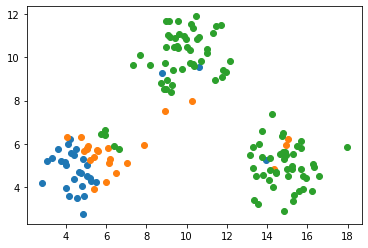

461   [0.82, 0.82, 0.83, 0.84, 0.84]
462   [0.82, 0.82, 0.83, 0.83, 0.84]
463   [0.82, 0.82, 0.83, 0.83, 0.84]
464   [0.82, 0.82, 0.82, 0.83, 0.83]
465   [0.82, 0.82, 0.82, 0.83, 0.83]
466   [0.82, 0.82, 0.82, 0.83, 0.83]
467   [0.78, 0.81, 0.82, 0.82, 0.82]
468   [0.78, 0.81, 0.82, 0.82, 0.82]
469   [0.78, 0.81, 0.82, 0.82, 0.82]
470   [0.78, 0.81, 0.82, 0.82, 0.82]
471   [0.78, 0.81, 0.82, 0.82, 0.82]
472   [0.78, 0.81, 0.82, 0.82, 0.82]
473   [0.78, 0.81, 0.82, 0.82, 0.82]
474   [0.78, 0.81, 0.81, 0.81, 0.82]
475   [0.78, 0.81, 0.81, 0.81, 0.82]
476   [0.77, 0.78, 0.78, 0.81, 0.81]
477   [0.77, 0.78, 0.78, 0.81, 0.81]
478   [0.77, 0.78, 0.78, 0.81, 0.81]
479   [0.77, 0.78, 0.78, 0.81, 0.81]
480   [0.77, 0.78, 0.78, 0.81, 0.81]


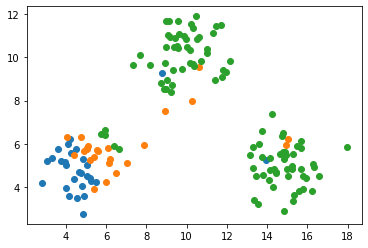

481   [0.77, 0.78, 0.78, 0.81, 0.81]
482   [0.77, 0.78, 0.78, 0.81, 0.81]
483   [0.77, 0.78, 0.78, 0.81, 0.81]
484   [0.77, 0.77, 0.78, 0.78, 0.78]
485   [0.77, 0.77, 0.78, 0.78, 0.78]
486   [0.77, 0.77, 0.78, 0.78, 0.78]
487   [0.77, 0.77, 0.78, 0.78, 0.78]
488   [0.77, 0.77, 0.78, 0.78, 0.78]
489   [0.77, 0.77, 0.78, 0.78, 0.78]
490   [0.77, 0.77, 0.78, 0.78, 0.78]
491   [0.77, 0.77, 0.78, 0.78, 0.78]
492   [0.77, 0.77, 0.78, 0.78, 0.78]
493   [0.77, 0.77, 0.78, 0.78, 0.78]
494   [0.73, 0.77, 0.77, 0.78, 0.78]
495   [0.73, 0.77, 0.77, 0.78, 0.78]
496   [0.73, 0.77, 0.77, 0.78, 0.78]
497   [0.73, 0.73, 0.77, 0.77, 0.78]
498   [0.73, 0.73, 0.74, 0.77, 0.77]
499   [0.73, 0.73, 0.74, 0.77, 0.77]


In [161]:
npopul = 100         #  Размер популяции
nsurv = 20           #  Число выживших ботов
nnew = npopul-nsurv  #  Новых ботов
l = 150              #  Генов у бота
mut = 0.05           #  Коэффициент мутации
epohs = 500          #  Эпохи


popul = []
val = []

for i in range(npopul):
  popul.append(createBot())
  
for it in range(epohs):
  
  val = [ErrorBot(bot) for bot in popul]
  
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)

  print(it, " ", [round(i,2) for i in sval[0:5]])
  if (it % 20 == 0):     # Каждую 20-ую эпоху 
    for i in range(count_class):
      plotPoints = points[newpopul[0]==i,:]
      plt.scatter(plotPoints[:,0], plotPoints[:,1])
    plt.show()

  for i in range(nnew):  # Создаем новых ботов
    
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []
    
    for j in range(l): 
      x = crossPointFrom2Parents(botp1, botp2, j) 
      if (random.random() < mut):
        x = random.randint(0,2)
      
      newbot.append(x)
      
    newbot = np.array(newbot)
    newpopul.append(newbot)
    
  popul = newpopul

# Выводы:

1. Генетические алгоритмы вполне способны решить данную задачу.
2. Чем больше точек одного класса тем больше времени нужно для нахождения оптимального результата.
3. Для наилучшего результата требуется применять правильные функции нахождения ошибки и стремиться ее уменьшать.